# Part I - Prosper Loan Data Analysis
## by Doron Dusheiko

## Introduction
A dataset of 113,937 loans is provided by Prosper. Each loan has 81 variables including loan amount, borrower rate/interest rate, loan status, borrower income and many others. 

The goal of this analysis is to answer the following question: **What affects the borrowers interest rate?**



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)

(113937, 81)


In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Given the large number of variables, I'll explore each by data type

In [4]:
print(df.dtypes[df.dtypes == 'object'])
print(df.dtypes[df.dtypes == 'float64'])
print(df.dtypes[df.dtypes == 'int64'])
print(df.dtypes[df.dtypes == 'bool'])

ListingKey                 object
ListingCreationDate        object
CreditGrade                object
LoanStatus                 object
ClosedDate                 object
ProsperRating (Alpha)      object
BorrowerState              object
Occupation                 object
EmploymentStatus           object
GroupKey                   object
DateCreditPulled           object
FirstRecordedCreditLine    object
IncomeRange                object
LoanKey                    object
LoanOriginationDate        object
LoanOriginationQuarter     object
MemberKey                  object
dtype: object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperScore                           float64
EmploymentStatusDuration        

In [5]:
categorical_cols = ['CreditGrade', 'ProsperRating (Alpha)', 'BorrowerState','Occupation','EmploymentStatus','IncomeRange']
numeric_cols = ['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'DebtToIncomeRatio', 'TotalProsperLoans', 'MonthlyLoanPayment', 'ListingCategory (numeric)', 'LoanOriginalAmount' ]
bool_cols = ['IsBorrowerHomeowner']
all_cols = categorical_cols + numeric_cols + bool_cols
df[all_cols].head(10)

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,BorrowerRate,ProsperRating (numeric),ProsperScore,EmploymentStatusDuration,...,TotalCreditLinespast7years,InquiriesLast6Months,DelinquenciesLast7Years,PublicRecordsLast12Months,DebtToIncomeRatio,TotalProsperLoans,MonthlyLoanPayment,ListingCategory (numeric),LoanOriginalAmount,IsBorrowerHomeowner
0,C,NaN,CO,Other,Self-employed,"$25,000-49,999",0.1580,NaN,NaN,2.0,...,12.0,3.0,4.0,0.0,0.17,NaN,330.43,0,9425,True
1,NaN,A,CO,Professional,Employed,"$50,000-74,999",0.0920,6.0,7.0,44.0,...,29.0,3.0,0.0,0.0,0.18,NaN,318.93,2,10000,False
2,HR,NaN,GA,Other,Not available,Not displayed,0.2750,NaN,NaN,NaN,...,3.0,0.0,0.0,NaN,0.06,NaN,123.32,0,3001,False
3,NaN,A,GA,Skilled Labor,Employed,"$25,000-49,999",0.0974,6.0,9.0,113.0,...,29.0,0.0,14.0,0.0,0.15,NaN,321.45,16,10000,True
4,NaN,D,MN,Executive,Employed,"$100,000+",0.2085,3.0,4.0,44.0,...,49.0,1.0,0.0,0.0,0.26,1.0,563.97,2,15000,True
5,NaN,B,NM,Professional,Employed,"$100,000+",0.1314,5.0,10.0,82.0,...,49.0,0.0,0.0,0.0,0.36,NaN,342.37,1,15000,True
6,NaN,E,KS,Sales - Retail,Employed,"$25,000-49,999",0.2712,2.0,2.0,172.0,...,20.0,0.0,0.0,0.0,0.27,NaN,122.67,1,3000,False
7,NaN,C,CA,Laborer,Employed,"$25,000-49,999",0.2019,4.0,4.0,103.0,...,10.0,3.0,0.0,0.0,0.24,NaN,372.60,2,10000,False
8,NaN,AA,IL,Food Service,Employed,"$25,000-49,999",0.0629,7.0,9.0,269.0,...,32.0,1.0,0.0,0.0,0.25,NaN,305.54,7,10000,True
9,NaN,AA,IL,Food Service,Employed,"$25,000-49,999",0.0629,7.0,11.0,269.0,...,32.0,1.0,0.0,0.0,0.25,NaN,305.54,7,10000,True


Before working with the data, I'd like to make a few changes so that its easier to work with:

- CreditGrade is used prior to July 2009, while ProsperRating (alpha and numeric)/ProsperScore are used from July 2009. I'd like to add a `IsNewRating` yes/no flag that allows me to easily filter one or the other. I thought about melting the different types of ratings columns, however since there score values might be different in the different time periods, I don't feel this is a good idea.
- Convert `Occupation` and `EmploymentStatus` to nominal categorical variables and `IncomeRange`, `CreditGrade` and `ProsperRatingAlpha` to a ordinal categorical variable.
- Although `ListingCategory (numeric)` is a numeric field, I feel its well suited to being a nominal categorical variable instead, so will convert it.
- Rename a few columns to make them easier to work with.

In [6]:
# renaming columns to make them easier to work with
df.rename(columns={'ProsperRating (numeric)': 'ProsperRatingNumeric', 'ProsperRating (Alpha)': 'ProsperRatingAlpha', 'ListingCategory (numeric)':'ListingCategoryNumeric'}, inplace=True)

# convert income range, credit grade and prosper rating alpha into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperRatingAlpha': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    
# convert loan status, listing category, occupation, employment status into nominal categorical variables
nominal_vars = ['ListingCategoryNumeric', 'Occupation', 'EmploymentStatus']
df[nominal_vars] = df[nominal_vars].astype('category')

# a new rating is a record which has a value for ProsperRatingAlpha (and ProsperRatingNumber/ProsperRatingScore), IsNewRating should be True when ProsperRatingAlpha is not null
df['IsNewRating'] = ~df['ProsperRatingAlpha'].isna()

In [7]:
# put each type of data into its own set of named columns so that its easier to pick these out later
categorical_cols = ['CreditGrade', 'ProsperRatingAlpha', 'BorrowerState','Occupation','EmploymentStatus','IncomeRange']
numeric_cols = ['BorrowerRate', 'ProsperRatingNumeric', 'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'DebtToIncomeRatio', 'TotalProsperLoans', 'MonthlyLoanPayment', 'ListingCategoryNumeric', 'LoanOriginalAmount' ]
bool_cols = ['IsBorrowerHomeowner', 'IsNewRating']
all_cols = categorical_cols + numeric_cols + bool_cols
df_trimmed = df[all_cols]
df_trimmed.head(10)

,CreditGrade,ProsperRatingAlpha,BorrowerState,Occupation,EmploymentStatus,IncomeRange,BorrowerRate,ProsperRatingNumeric,ProsperScore,EmploymentStatusDuration,...,InquiriesLast6Months,DelinquenciesLast7Years,PublicRecordsLast12Months,DebtToIncomeRatio,TotalProsperLoans,MonthlyLoanPayment,ListingCategoryNumeric,LoanOriginalAmount,IsBorrowerHomeowner,IsNewRating
0,C,NaN,CO,Other,Self-employed,"$25,000-49,999",0.1580,NaN,NaN,2.0,...,3.0,4.0,0.0,0.17,NaN,330.43,0,9425,True,False
1,NaN,A,CO,Professional,Employed,"$50,000-74,999",0.0920,6.0,7.0,44.0,...,3.0,0.0,0.0,0.18,NaN,318.93,2,10000,False,True
2,HR,NaN,GA,Other,Not available,Not displayed,0.2750,NaN,NaN,NaN,...,0.0,0.0,NaN,0.06,NaN,123.32,0,3001,False,False
3,NaN,A,GA,Skilled Labor,Employed,"$25,000-49,999",0.0974,6.0,9.0,113.0,...,0.0,14.0,0.0,0.15,NaN,321.45,16,10000,True,True
4,NaN,D,MN,Executive,Employed,"$100,000+",0.2085,3.0,4.0,44.0,...,1.0,0.0,0.0,0.26,1.0,563.97,2,15000,True,True
5,NaN,B,NM,Professional,Employed,"$100,000+",0.1314,5.0,10.0,82.0,...,0.0,0.0,0.0,0.36,NaN,342.37,1,15000,True,True
6,NaN,E,KS,Sales - Retail,Employed,"$25,000-49,999",0.2712,2.0,2.0,172.0,...,0.0,0.0,0.0,0.27,NaN,122.67,1,3000,False,True
7,NaN,C,CA,Laborer,Employed,"$25,000-49,999",0.2019,4.0,4.0,103.0,...,3.0,0.0,0.0,0.24,NaN,372.60,2,10000,False,True
8,NaN,AA,IL,Food Service,Employed,"$25,000-49,999",0.0629,7.0,9.0,269.0,...,1.0,0.0,0.0,0.25,NaN,305.54,7,10000,True,True
9,NaN,AA,IL,Food Service,Employed,"$25,000-49,999",0.0629,7.0,11.0,269.0,...,1.0,0.0,0.0,0.25,NaN,305.54,7,10000,True,True


In [8]:
df_trimmed.isnull().sum()

CreditGrade                   84984
ProsperRatingAlpha            29084
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
IncomeRange                       0
BorrowerRate                      0
ProsperRatingNumeric          29084
ProsperScore                  29084
EmploymentStatusDuration       7625
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
TotalCreditLinespast7years      697
InquiriesLast6Months            697
DelinquenciesLast7Years         990
PublicRecordsLast12Months      7604
DebtToIncomeRatio              8554
TotalProsperLoans             91852
MonthlyLoanPayment                0
ListingCategoryNumeric            0
LoanOriginalAmount                0
IsBorrowerHomeowner               0
IsNewRating                       0
dtype: int64

In [9]:
df_trimmed.describe()

,BorrowerRate,ProsperRatingNumeric,ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,TotalCreditLinespast7years,InquiriesLast6Months,DelinquenciesLast7Years,PublicRecordsLast12Months,DebtToIncomeRatio,TotalProsperLoans,MonthlyLoanPayment,LoanOriginalAmount
count,113937.000000,84853.000000,84853.000000,106312.000000,113346.000000,113346.000000,113240.000000,113240.000000,112947.000000,106333.000000,105383.000000,22085.000000,113937.000000,113937.00000
mean,0.192764,4.072243,5.950067,96.071582,685.567731,704.567731,26.754539,1.435085,4.154984,0.015094,0.275947,1.421100,272.475783,8337.01385
std,0.074818,1.673227,2.376501,94.480605,66.458275,66.458275,13.637871,2.437507,10.160216,0.154092,0.551759,0.764042,192.697812,6245.80058
min,0.000000,1.000000,1.000000,0.000000,0.000000,19.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.00000
25%,0.134000,3.000000,4.000000,26.000000,660.000000,679.000000,17.000000,0.000000,0.000000,0.000000,0.140000,1.000000,131.620000,4000.00000
50%,0.184000,4.000000,6.000000,67.000000,680.000000,699.000000,25.000000,1.000000,0.000000,0.000000,0.220000,1.000000,217.740000,6500.00000
75%,0.250000,5.000000,8.000000,137.000000,720.000000,739.000000,35.000000,2.000000,3.000000,0.000000,0.320000,2.000000,371.580000,12000.00000
max,0.497500,7.000000,11.000000,755.000000,880.000000,899.000000,136.000000,105.000000,99.000000,20.000000,10.010000,8.000000,2251.510000,35000.00000


### What is the structure of your dataset?

There are 113937 loans in the dataset with 81 features. Most variables are numeric, however `CreditGrade`, `ProsperRating (Alpha)` and `IncomeRange` are ordinal while `LoanStatus`, `Occupation` and `EmploymentStatus` are nominal categorical variables. `CreditGrade` is the rating of the customer pre-July 2099 and `ProsperRating (Alpha)` (along with `PropserRating (numeric)` and `ProsperScore`) is the rating post-July 2009.    

### What is/are the main feature(s) of interest in your dataset?

I'm primarily interested in the understanding which variables affect the interest rate offered to the borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are a lot of possibilities with this data set, however I will focus on the credit grade/prosper rating, occupation, employment state, income range, number of credit lines ov erthe last 7 years, number of inquiries over last 6 months, delinqiencies over last 7 years, public records over last 12 months, debt to income ratio, total number of propser loans, monthly loan payment, listing category and the original loan amount requested. I feel these variables are likely to be the primary factors in deciding on a interest rate offered to the customer.

At a high-level, I'm putting down some ideas for later explorations, across univariate, bivariat and multivariate analysis:
- Distribution of `BorrowerRate`, `Occupation`, `EmploymentStatus`, `IncomeRange`, `CreditGrade`, `ProsperScore`, `DebtToIncomeRatio`, `LoanOriginalAmount`, `IsBorrowerHomeowner` and `IsNewRating`
- Scatter Plot of `BorrowerRate` by `LoanOriginalAmount` and `BorrowerRate` and `ProsperScore`
- Facet Plots mapping `BorrowerRate` across different levels of `IncomeRange`, `EmploymentStatus` and `Occupation`
- Scatter plots of `BorrowerRate` vs. `LoanOriginalAmount`, with an additional hue variable of `DebtToIncome` ratio
- Correlation/heat map between `TotalCreditLinespast7years`, `InquiriesLast6Months`, `DelinquenciesLast7Years`, `PublicRecordsLast12Months` and `BorroweRate`. 

## Univariate Exploration



First let's investigate our primary variable of interest, the interest rate

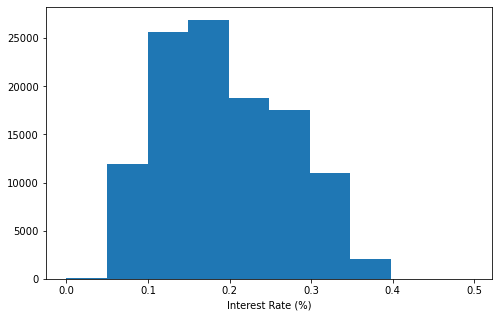

In [10]:
# start with a standard-scaled plot
plt.figure(figsize=[8, 5])
plt.hist(data = df_trimmed, x = 'BorrowerRate')
plt.xlabel('Interest Rate (%)')
plt.show()

The distribution is slightly right-skewed, with the majority of interest rates being 0.1 and 0.2%. Let's investigate further

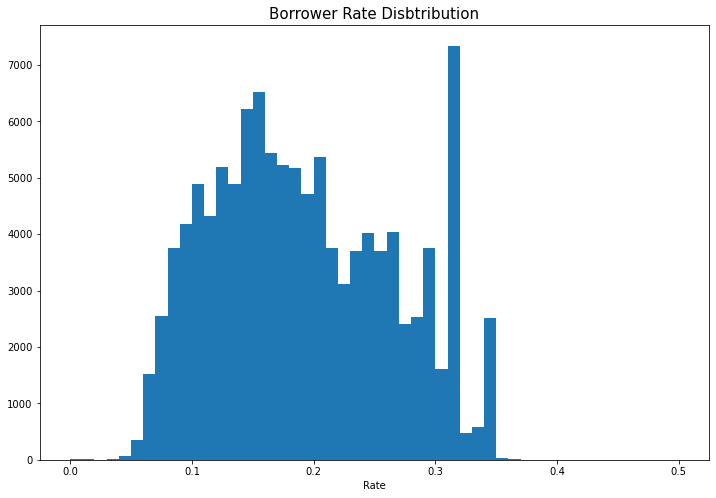

In [11]:
# start with a standard-scaled plot
binsize = 0.01
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_trimmed, x = 'BorrowerRate', bins=bins)
plt.xlabel('Rate')
plt.title("Borrower Rate Disbtribution", fontsize=15);
plt.show()

In [12]:
df_trimmed['BorrowerRate'].value_counts().sort_values(ascending=False)

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.1526       1
0.2960       1
0.0627       1
0.3478       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

There is a large spike at 0.3177, might be interested to see whats common amongst these specific applications later.

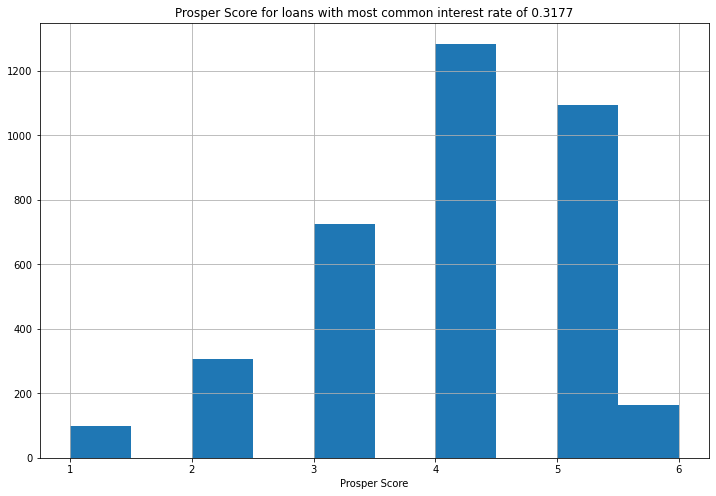

In [13]:
plt.figure(figsize=(12,8))
ax = df_trimmed[df_trimmed.BorrowerRate == 0.3177].ProsperScore.hist()
ax.set_title('Prosper Score for loans with most common interest rate of 0.3177')
ax.set_xlabel('Prosper Score');

Although all these applications have the same interest rate, they have a reasonably wide range of Prosper scores assigned to them, although 4 and 5 are the most common. This means that prosper score alone is not the sole factor dictating the interest rate offered.

 Lets get a high-level glimpse of the distribution of our variables, before drilling into the details

C:\CondaEnvs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\CondaEnvs\ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


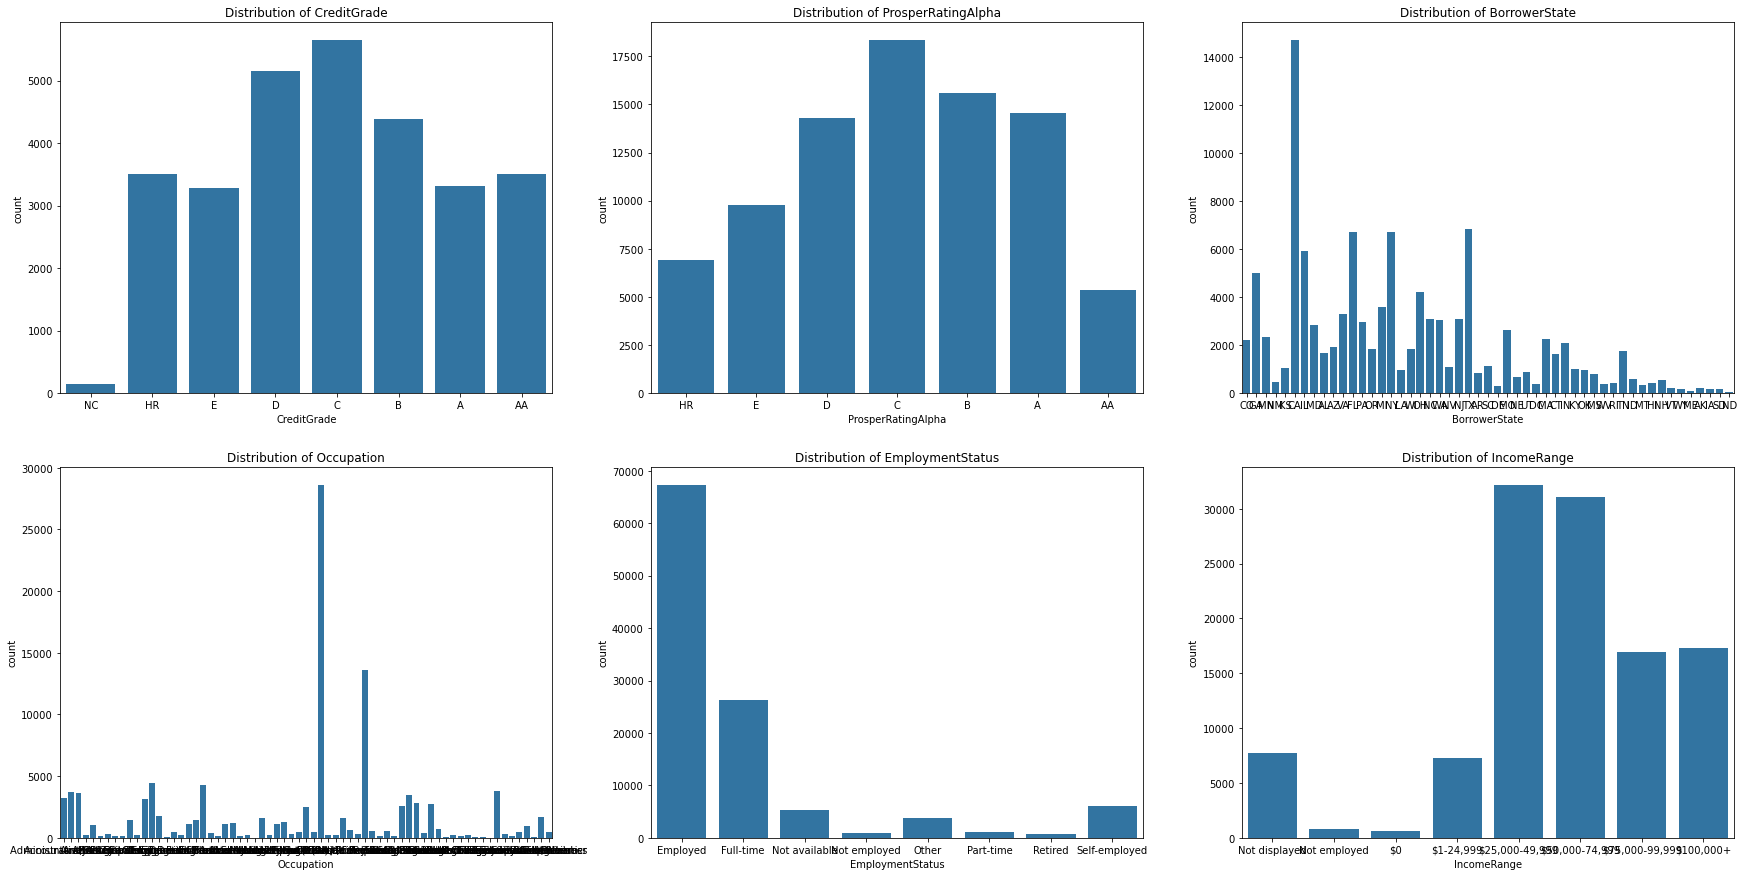

In [14]:
default_color = sb.color_palette()[0]
plt.figure(figsize=(30,15))
for index, col in enumerate(categorical_cols):
    plt.subplot(2, 3, index+1)
    sb.countplot(df[col],  color = default_color).set_title(f'Distribution of {col}');

Under the old scoring system, we can see that scores C and D were most common, while C and B are most common under the new system. Its hard to read some of the other graphs as there is too much info, so let's investigate them individually.

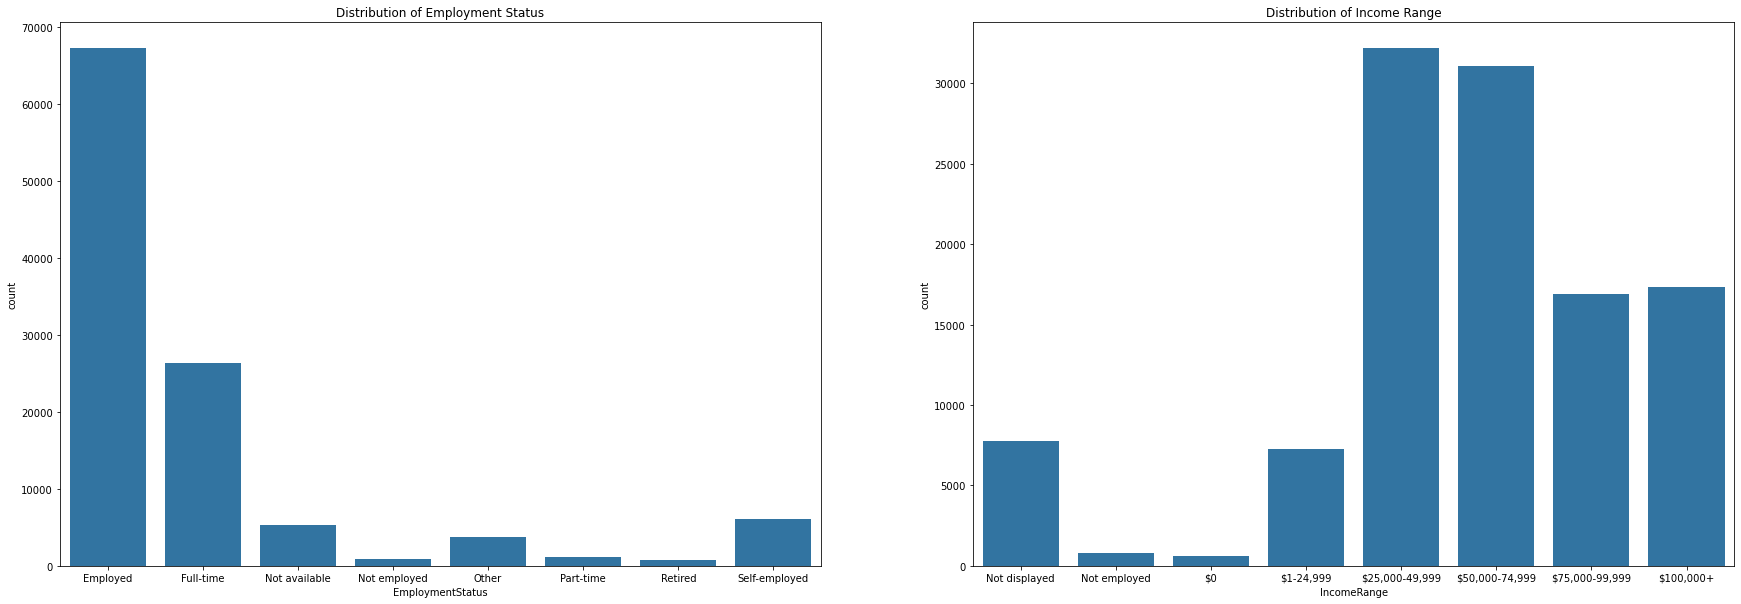

In [15]:
fig, ax = plt.subplots(ncols=2, figsize = [30,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_trimmed, x = 'EmploymentStatus', color = default_color, ax = ax[0]).set_title('Distribution of Employment Status')
sb.countplot(data = df_trimmed, x = 'IncomeRange', color = default_color, ax = ax[1]).set_title('Distribution of Income Range')
plt.show()

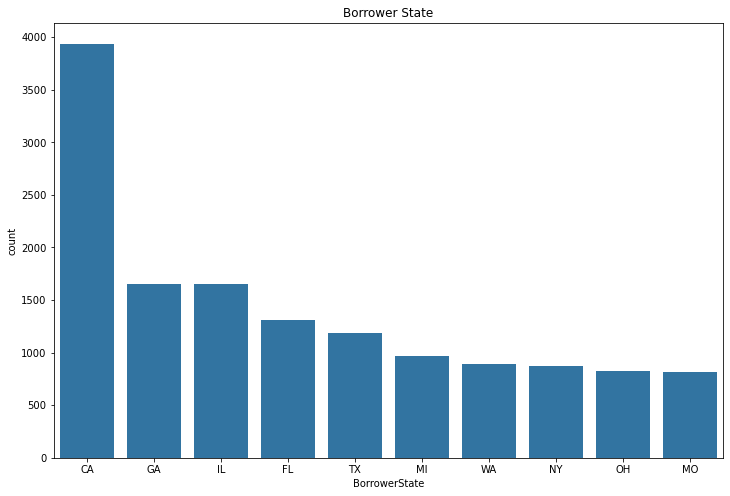

In [16]:
# Find the 10 top states and plot them as a bar chart
plot_data = df_trimmed.groupby('BorrowerState', as_index=False).count().sort_values('CreditGrade', ascending=False)[['BorrowerState','CreditGrade']].rename(columns={'CreditGrade':'count'}).head(10)
plt.figure(figsize=[12, 8])
default_color = sb.color_palette()[0]
sb.barplot(x="BorrowerState", y="count", data=plot_data, color = default_color)
plt.title('Borrower State')
plt.show()

<AxesSubplot:title={'center':'Top 10 Professions'}>

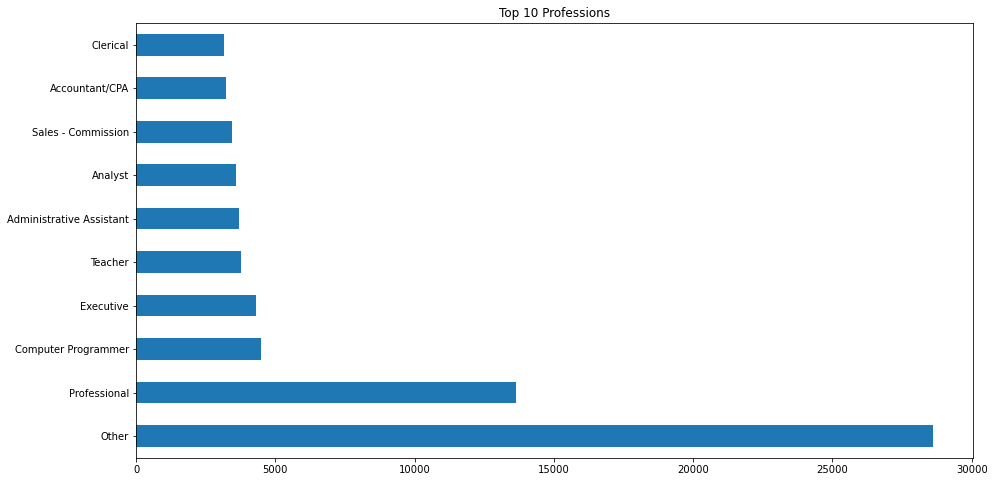

In [17]:
df_trimmed.Occupation.value_counts().sort_values(ascending=False)[:10].plot.barh(figsize=(15,8), title="Top 10 Professions")

<AxesSubplot:title={'center':'Bottom 10 Professions'}>

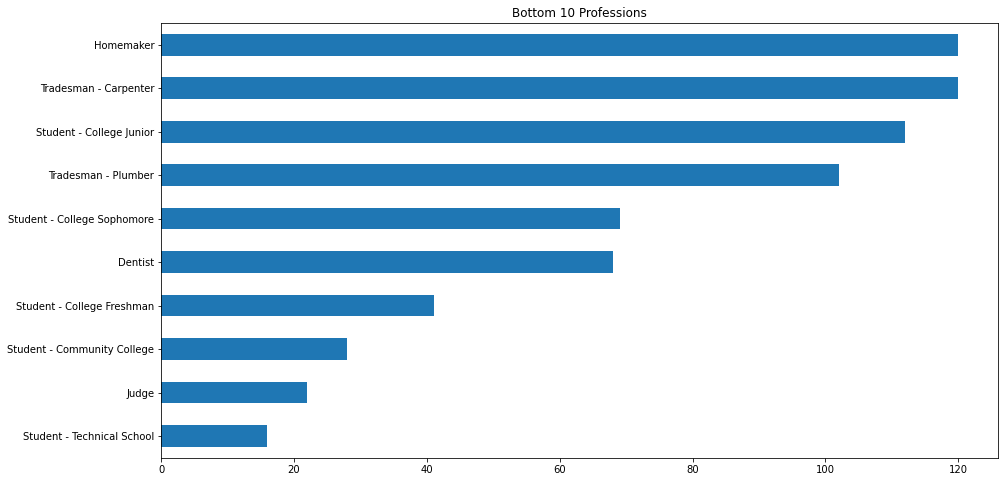

In [18]:
df_trimmed.Occupation.value_counts().sort_values(ascending=True)[:10].plot.barh(figsize=(15,8), title="Bottom 10 Professions")

Now we can see that most people are Employed (and likely Full-time employed) and least are not employed or retired. Most common income ranges are \\$25K - \\$50K and \\$50K - \\$75K and CA is the most common state. Other and Professional are the most common, which are likely just "catch-all" categories, this doesnt give us much info. Interestingly though, Computer Programmers are the most common "non-generic" listed profession. Most types of students form the bottom 10 listed professions, as one might expect.

Lets have a quick review of the numerical and boolean variables, in order to check for outliers

C:\CondaEnvs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


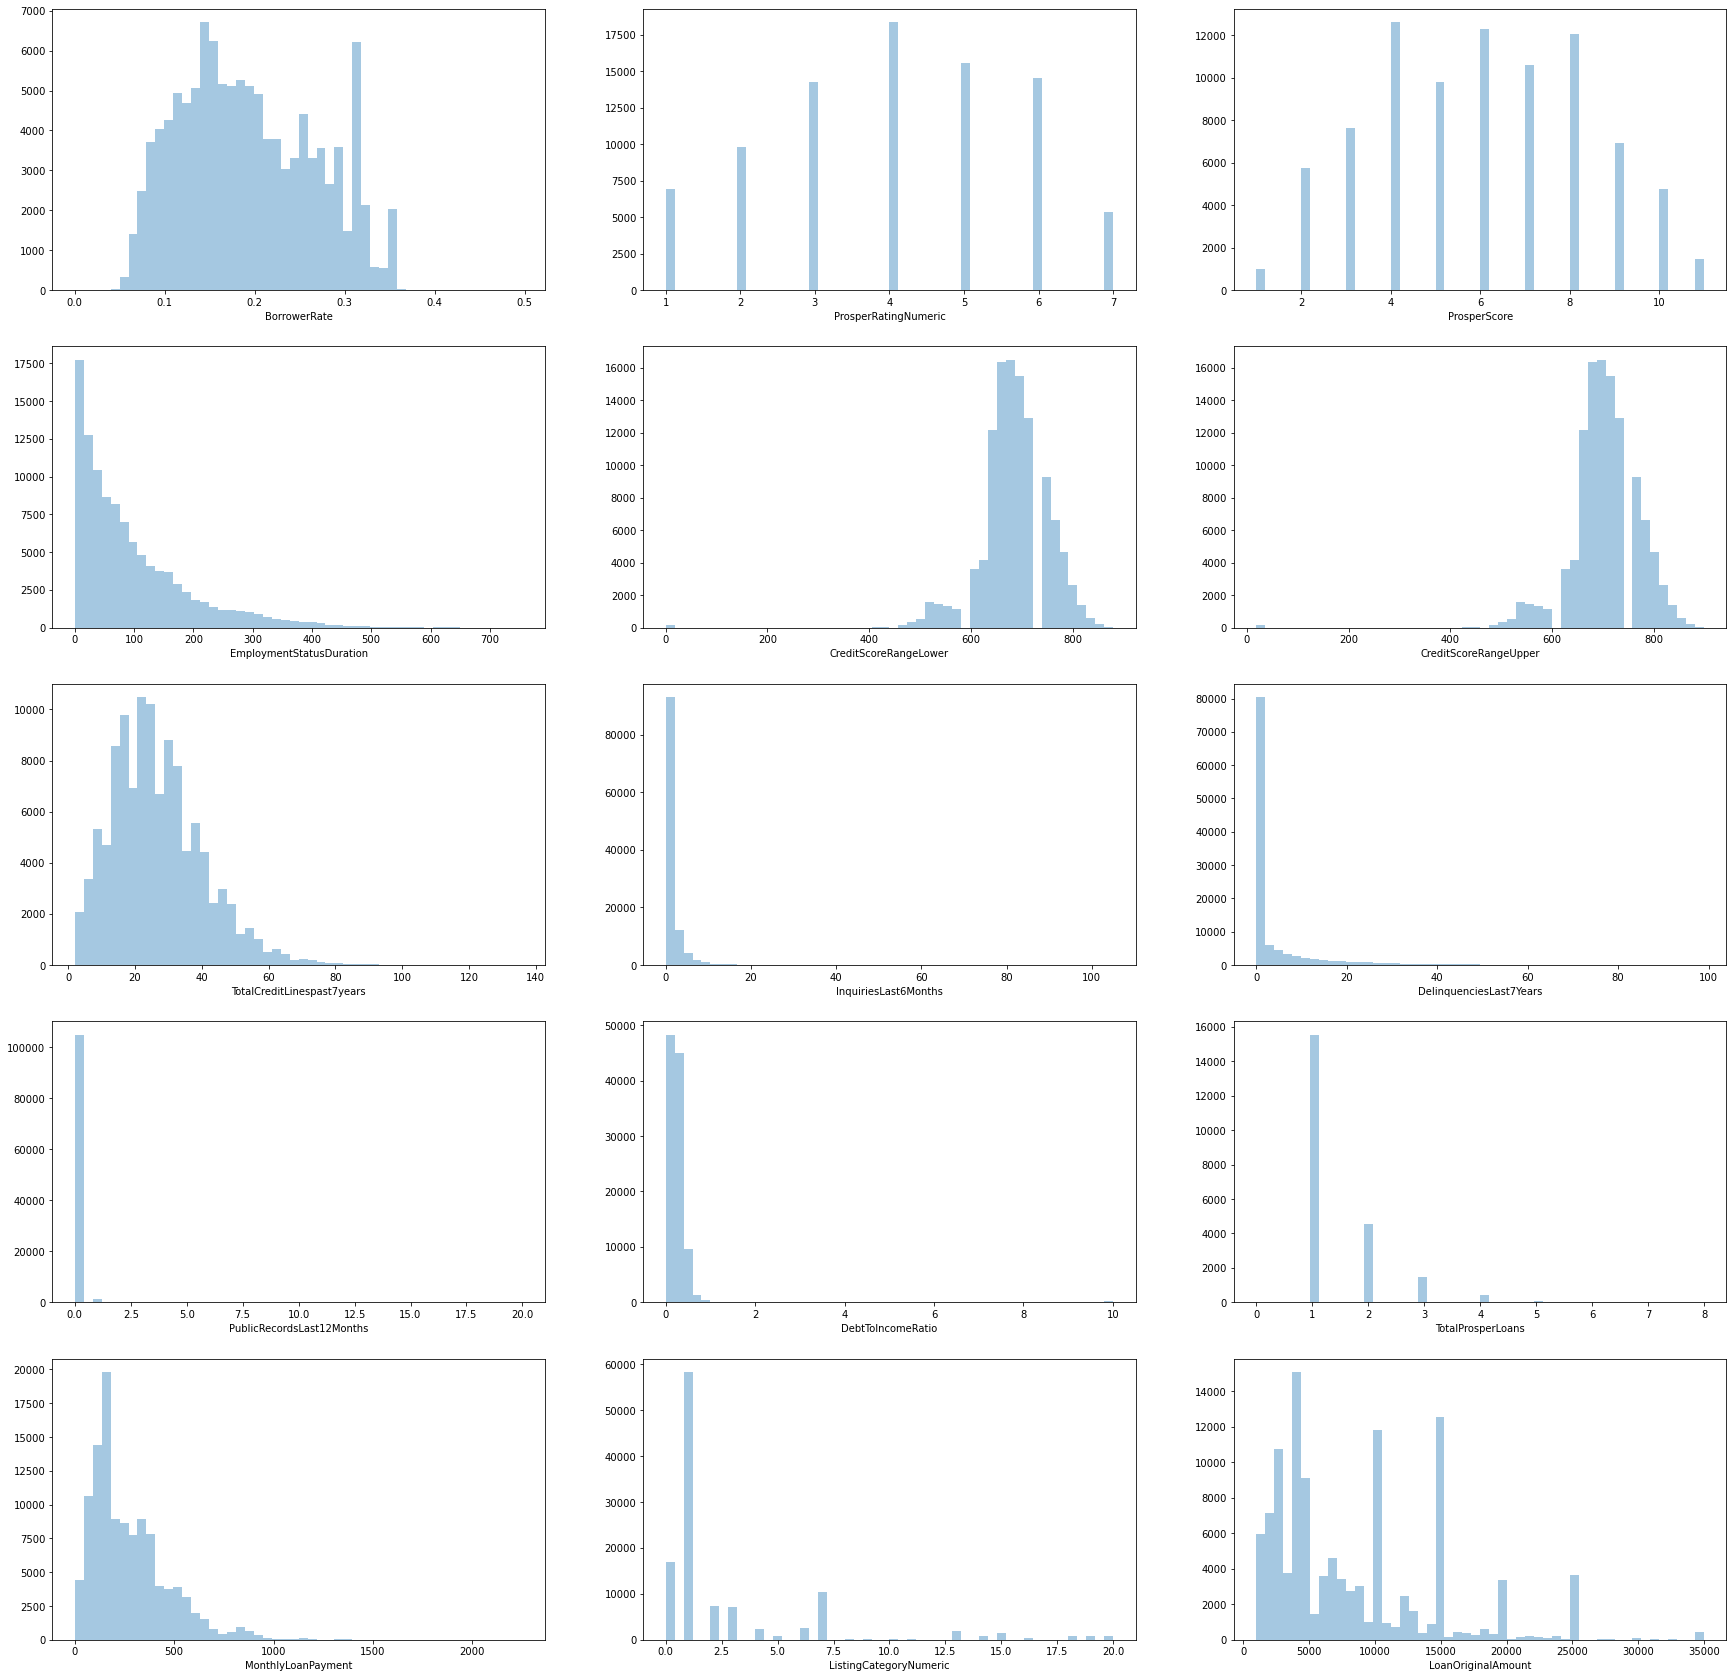

In [19]:
plt.figure(figsize=(30,30))
for index, col in enumerate(numeric_cols):
    plt.subplot(5, 3, index+1)
    sb.distplot(df[col], kde=False);

Initial insights:
- Prosper Rating and Score of 4 is most common. Prosper score of 6 and 8 is also quite common.
- Most people do not have any delinquincies, revolving credit monthly payments, public records or inquiries in the last 6 months. 
- Most have a single Prosper loan, but some have as many as 8
- Loan amounts seem to be most common on multiple of 5000. This makes sense as people tend to prefer nice round numbers.

Many of the variables above seem to have outliers, based on the heavily right-skewed distribution. Let's see if we can study them

In [20]:
cols = ['InquiriesLast6Months','DelinquenciesLast7Years','PublicRecordsLast12Months','DebtToIncomeRatio', 'MonthlyLoanPayment', 'LoanOriginalAmount']
df[cols].describe()

,InquiriesLast6Months,DelinquenciesLast7Years,PublicRecordsLast12Months,DebtToIncomeRatio,MonthlyLoanPayment,LoanOriginalAmount
count,113240.000000,112947.000000,106333.000000,105383.000000,113937.000000,113937.00000
mean,1.435085,4.154984,0.015094,0.275947,272.475783,8337.01385
std,2.437507,10.160216,0.154092,0.551759,192.697812,6245.80058
min,0.000000,0.000000,0.000000,0.000000,0.000000,1000.00000
25%,0.000000,0.000000,0.000000,0.140000,131.620000,4000.00000
50%,1.000000,0.000000,0.000000,0.220000,217.740000,6500.00000
75%,2.000000,3.000000,0.000000,0.320000,371.580000,12000.00000
max,105.000000,99.000000,20.000000,10.010000,2251.510000,35000.00000


Let's isolate the outliers and study them

In [67]:
high_outliers = ((df_trimmed['InquiriesLast6Months'] > 10) | (df_trimmed['DelinquenciesLast7Years'] > 10) | (df_trimmed['PublicRecordsLast12Months'] > 3) | (df_trimmed['DebtToIncomeRatio'] > 2) | (df_trimmed['MonthlyLoanPayment'] > 1000) | (df_trimmed['LoanOriginalAmount'] > 20000))
print(high_outliers.sum())
df_trimmed.loc[high_outliers, :]

21314


,CreditGrade,ProsperRatingAlpha,BorrowerState,Occupation,EmploymentStatus,IncomeRange,BorrowerRate,ProsperRatingNumeric,ProsperScore,EmploymentStatusDuration,...,InquiriesLast6Months,DelinquenciesLast7Years,PublicRecordsLast12Months,DebtToIncomeRatio,TotalProsperLoans,MonthlyLoanPayment,ListingCategoryNumeric,LoanOriginalAmount,IsBorrowerHomeowner,IsNewRating
3,NaN,A,GA,Skilled Labor,Employed,"$25,000-49,999",0.0974,6.0,9.0,113.0,...,0.0,14.0,0.0,0.15,NaN,321.45,16,10000,True,True
10,NaN,C,MD,Fireman,Employed,"$75,000-99,999",0.2489,4.0,7.0,300.0,...,1.0,28.0,0.0,0.12,NaN,395.37,1,13500,False,True
16,NaN,E,CA,Professional,Full-time,"$75,000-99,999",0.2809,2.0,4.0,133.0,...,1.0,12.0,0.0,0.15,3.0,124.76,6,4000,True,True
22,NaN,HR,NY,Other,Other,"$1-24,999",0.3134,1.0,2.0,68.0,...,0.0,0.0,0.0,9.20,NaN,172.76,1,4000,False,True
29,NaN,A,LA,Other,Employed,"$100,000+",0.1239,6.0,6.0,16.0,...,2.0,0.0,0.0,0.32,NaN,1169.03,1,35000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113911,NaN,D,MD,Other,Employed,"$25,000-49,999",0.2155,3.0,3.0,51.0,...,3.0,48.0,0.0,0.29,NaN,379.58,14,10000,False,True
113914,HR,NaN,CA,NaN,NaN,Not displayed,0.2500,NaN,NaN,NaN,...,9.0,16.0,NaN,0.05,NaN,119.28,0,3000,False,False
113916,NaN,E,FL,Professional,Employed,"$50,000-74,999",0.2932,2.0,6.0,149.0,...,1.0,18.0,0.0,0.15,NaN,168.32,13,4000,False,True
113926,E,NaN,CA,Other,Not available,Not displayed,0.2900,NaN,NaN,NaN,...,2.0,18.0,NaN,0.07,NaN,125.72,0,3000,False,False


Its not clear that there is anything wrong with these loans, however it will be good to view the effect on the distribution once they are removed.

In [22]:
df = df_trimmed.loc[-high_outliers,:]

C:\CondaEnvs\ds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


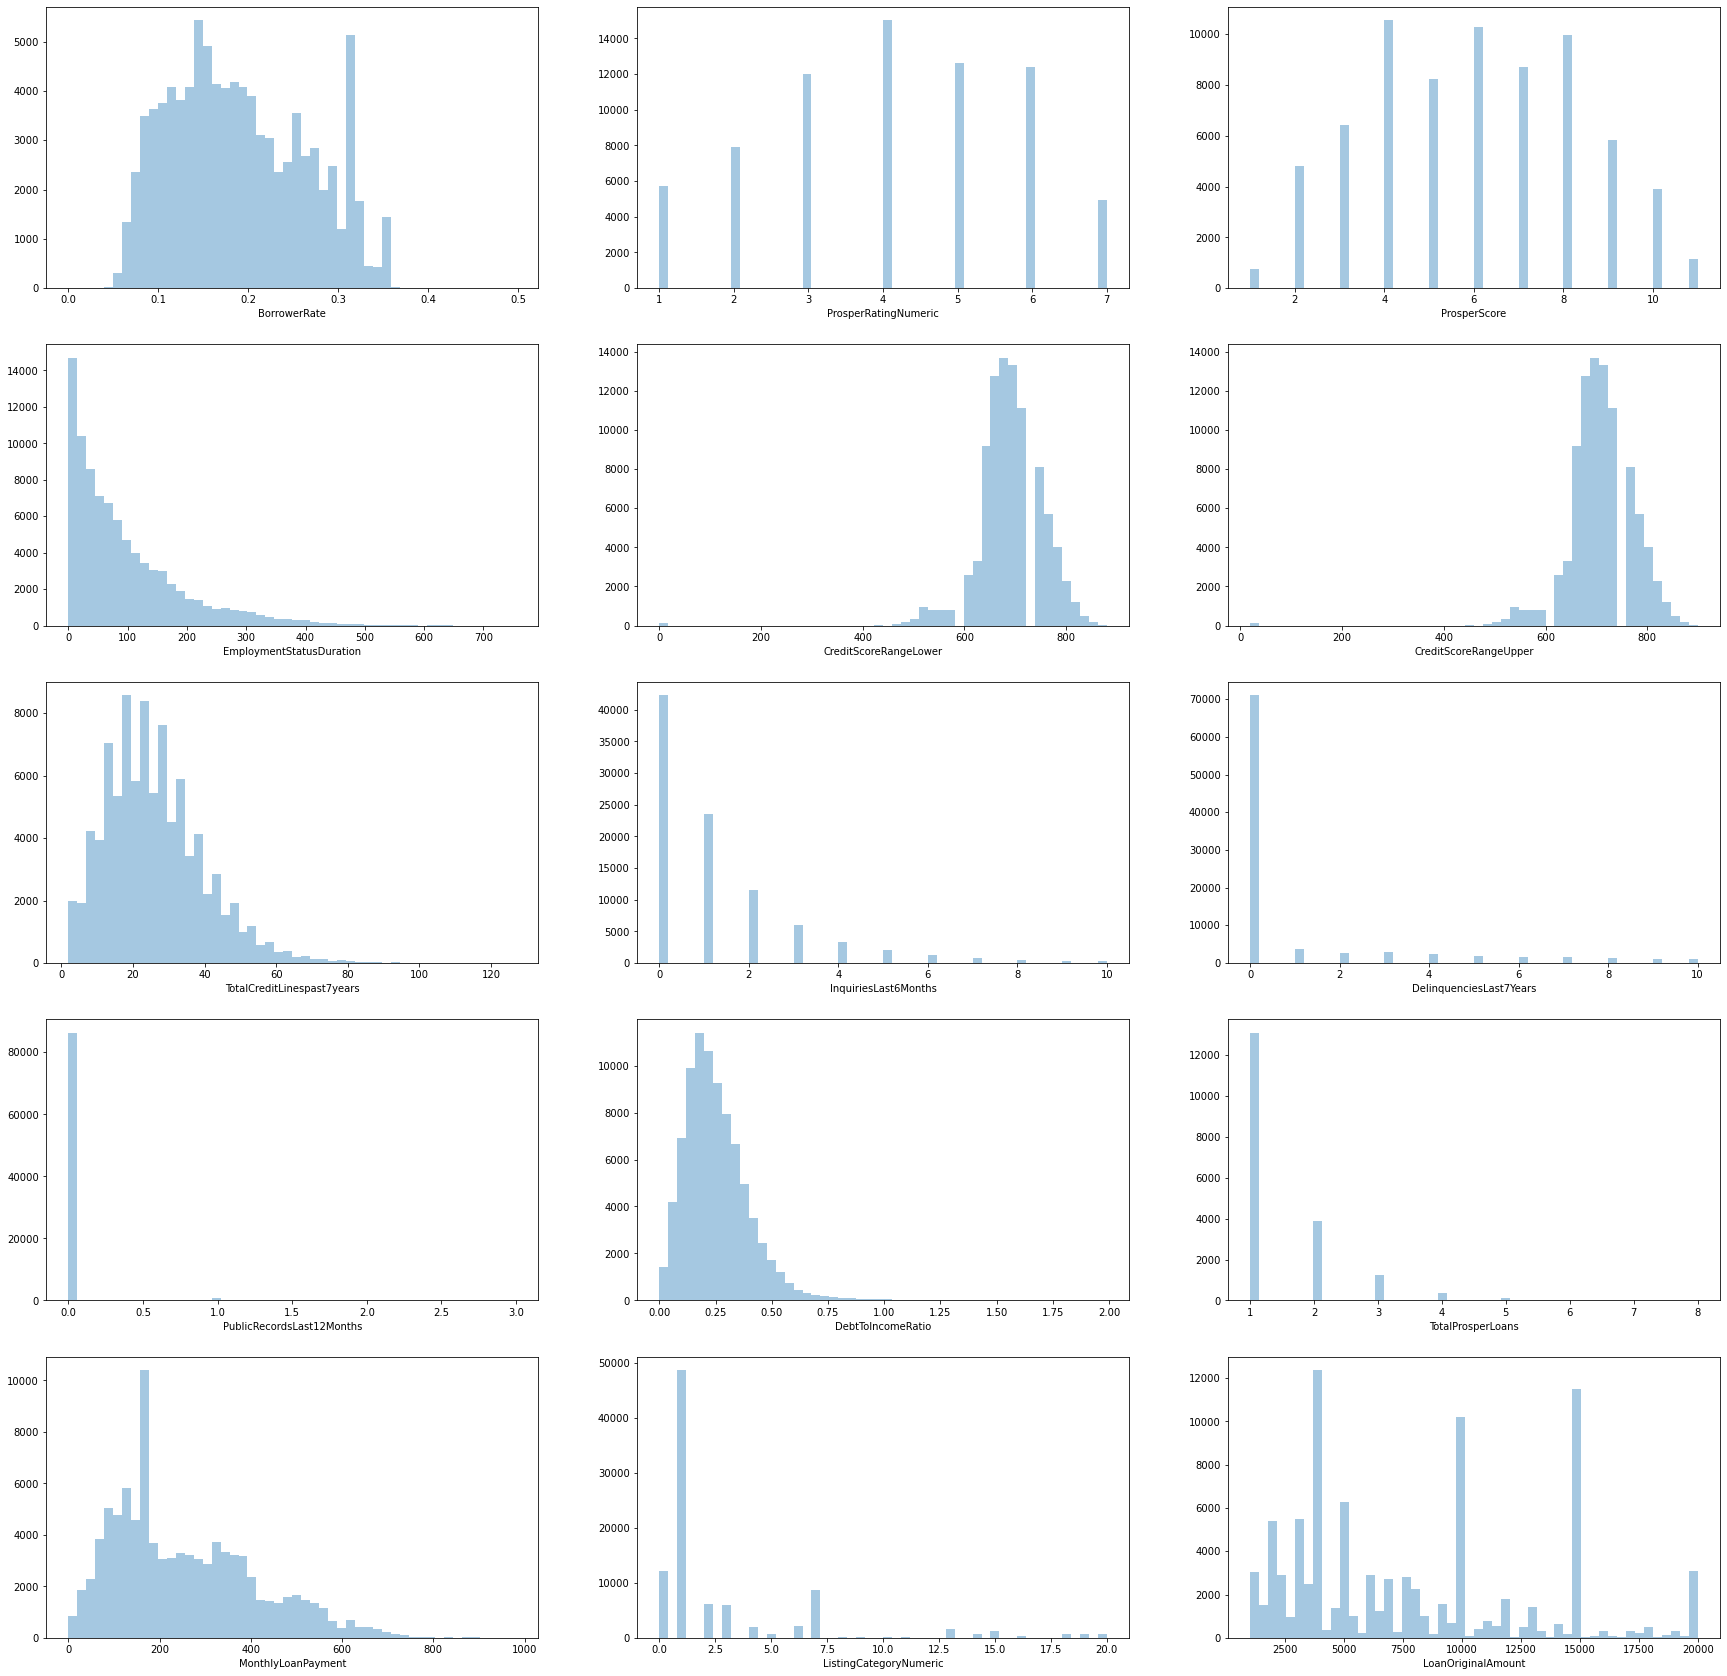

In [23]:
plt.figure(figsize=(30,30))
for index, col in enumerate(numeric_cols):
    plt.subplot(5, 3, index+1)
    sb.distplot(df[col], kde=False);

Now its a little more clear that:
- 0, 1, or 2 inquiries over the last 6 months are most common
- Most people have no delinquencies over the last 7 years, however for those that do, there seems to be an equal number of them occuring for 1-7 deliniquencues
- Almost everyone has 0 public records
- Debt to income ratio is centered around 0.25 with a slight right skew. 
- The most common monthly loan payment is around 180

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution is slightly right-skewed, with the majority of interest rates being 0.1 and 0.2%. There is a large spike at 0.3177. Although all these applications have the same interest rate, they have a reasonably wide range of Prosper scores assigned to them, although 4 and 5 are the most common. This means that prosper score alone is not the sole factor dictating the interest rate offered. The variables wasn't transformed however a more suitable bin size was chosen to get a more detailed view of the variable.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?



CreditGrade is used prior to July 2009, while ProsperRating (alpha and numeric)/ProsperScore are used from July 2009. A new `IsNewRating` yes/no flag was added that allows me to easily filter one or the other. I thought about melting the different types of ratings columns, however since there score values might be different in the different time periods, I don't feel this is a good idea.
Decided to convert Occupation and EmploymentStatus to nominal categorical variables and IncomeRange, CreditGrade and ProsperRatingAlpha to a ordinal categorical variable.
Although ListingCategory (numeric) is a numeric field, I feel its well suited to being a nominal categorical variable instead, so it was converted as well. A few columns were also renamed to make them easier to work with. 

In terms of the distribution study, we determined:

- Most people are Employed (and likely Full-time employed) and least are not employed or retired. 
- Most common income ranges are $25K - $50K and $50K - $75K
- CA is the most common state. 
- Other and Professional are the most common, which are likely just "catch-all" categories, this doesnt give us much info. Interestingly though, Computer Programmers are the most common "non-generic" listed profession. 
- Most types of students form the bottom 10 listed professions, as one might expect
- Prosper Rating and Score of 4 is most common. Prosper score of 6 and 8 is also quite common.
- Most people do not have any delinquincies, revolving credit monthly payments, public records or inquiries in the last 6 months.
- Most have a single Prosper loan, but some have as many as 8
- Loan amounts seem to be most common on multiple of 5000. This makes sense as people tend to prefer nice round numbers
- We noted outliers in the following fields and once removed, replotted some of the data to gain the above insights: `InquiriesLast6Months`,`DelinquenciesLast7Years`,`PublicRecordsLast12Months`,`DebtToIncomeRatio`, `MonthlyLoanPayment`, `LoanOriginalAmount`
- The data set used for the rest of the analysis will be the one with the outliers removed `df`

## Bivariate Exploration

In [24]:
categorical_cols = ['CreditGrade', 'ProsperRatingAlpha', 'BorrowerState','Occupation','EmploymentStatus','IncomeRange']
numeric_cols = ['BorrowerRate', 'ProsperRatingNumeric', 'ProsperScore', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'DebtToIncomeRatio', 'TotalProsperLoans', 'MonthlyLoanPayment', 'ListingCategoryNumeric', 'LoanOriginalAmount' ]
bool_cols = ['IsBorrowerHomeowner', 'IsNewRating']
all_cols = categorical_cols + numeric_cols + bool_cols

Let's have a look at pair-wise correlations between our numerical variables.

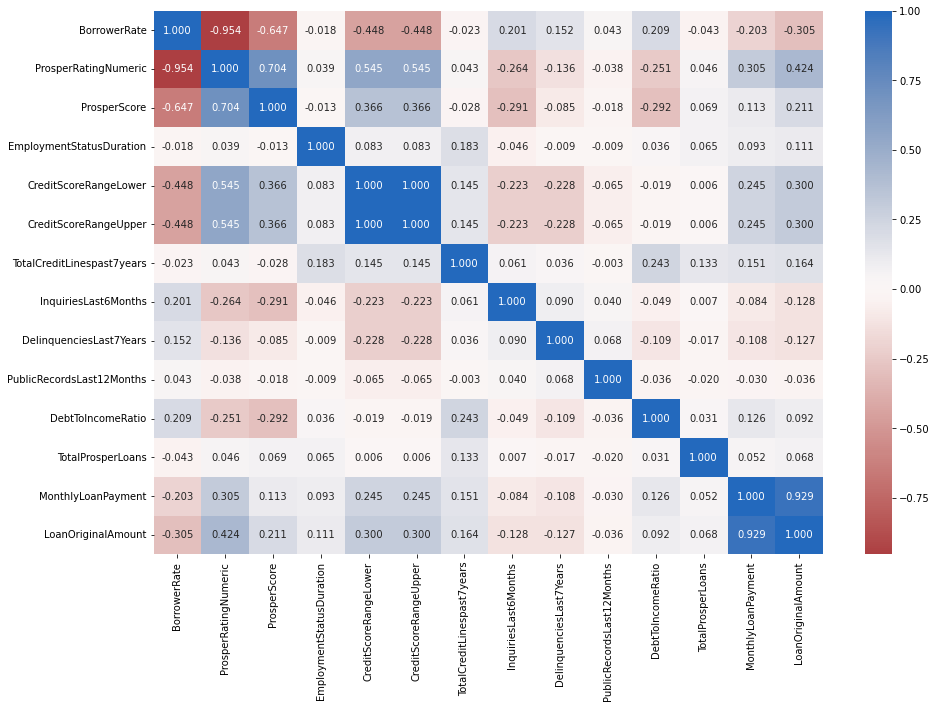

In [25]:
# correlation plot
plt.figure(figsize = [15, 10])
sb.heatmap(df[numeric_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We see some postiive correlations between monthly loan payment and loan original amount, as one would expect and negative correlations between borrower rate and prosperscore, i.e. the worse the score, the higher the rate. This doesn't give us too much info though as the prosper score is likely a function of all the other variables. As such, its an expoected correlation which doesn't describe why the borrower rate is what it is. 

Credit score has a medium strong negative correlation with borrower rate, i.e. the lower the credit score, the higher the borrower rate. Many of the other numeric variable have a weak linear correlation with borrower rate, but its possible that their relationship is non-linear with borrower rate. 

Let's try bring some of these non-linearities out now

df.shape= (92623, 23)
df_samp.shape= (500, 23)


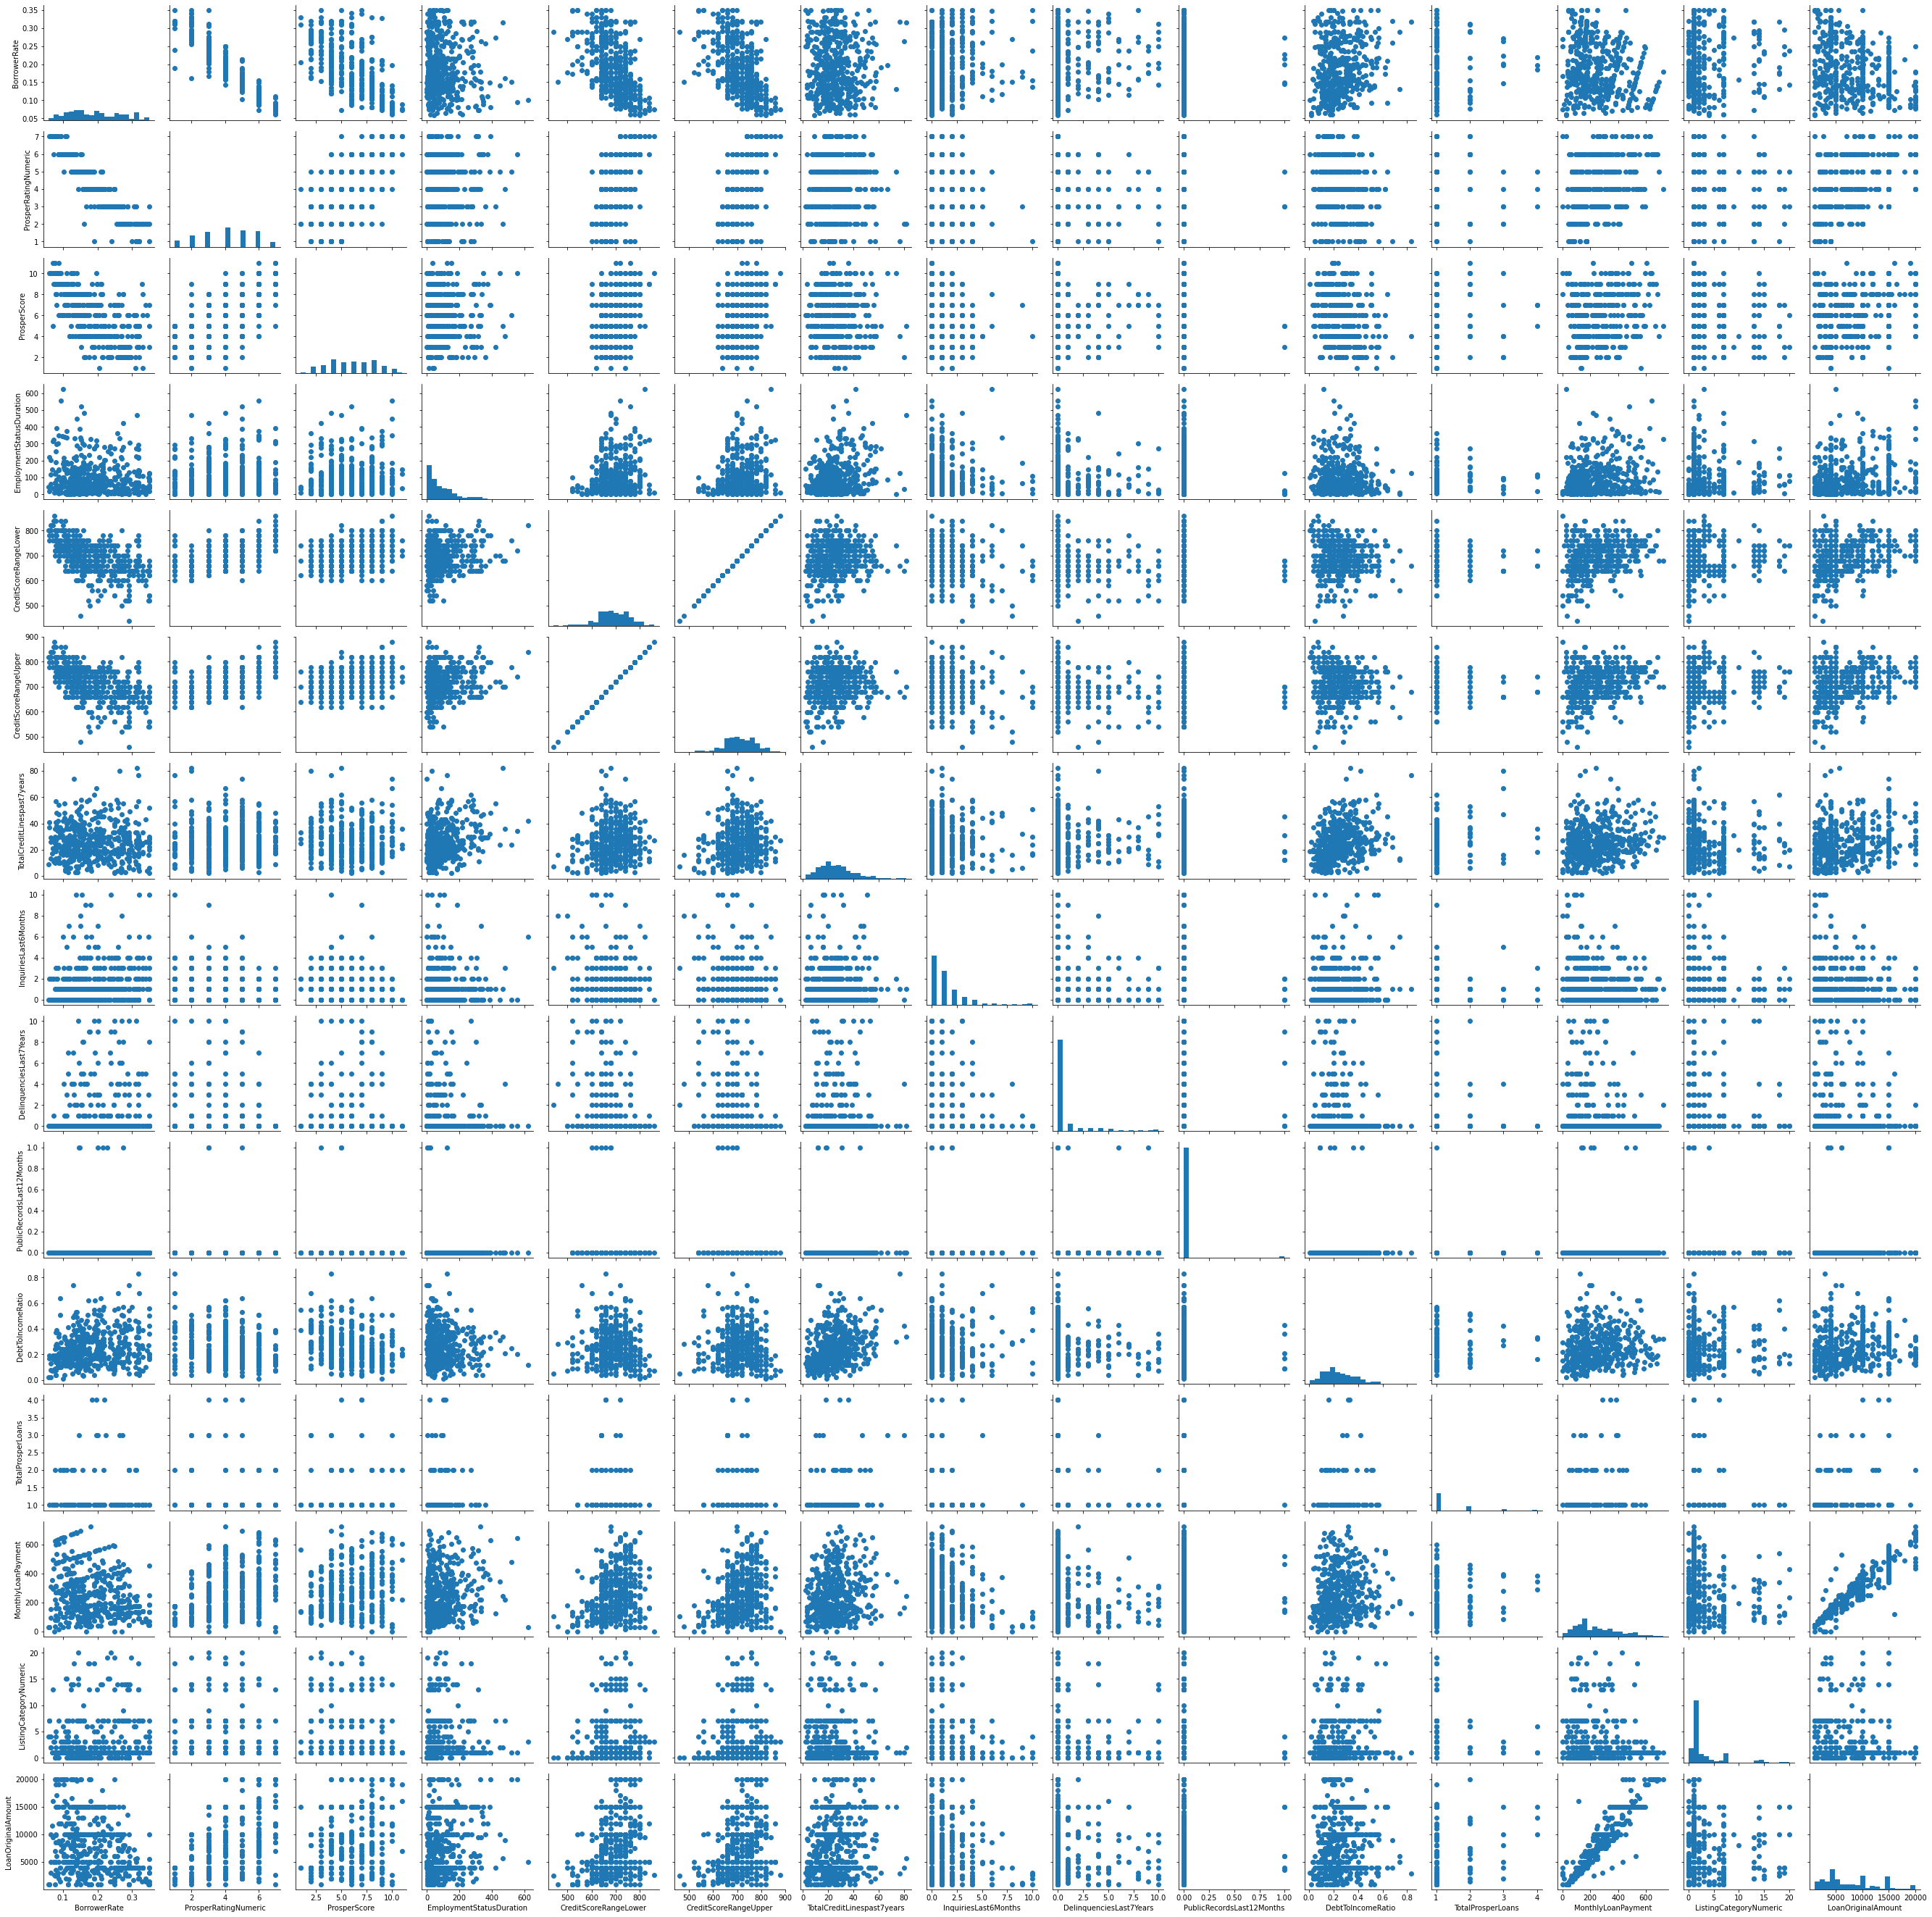

In [26]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("df.shape=",df.shape)
df_samp = df.sample(n=500, replace = False)
print("df_samp.shape=",df_samp.shape)

g = sb.PairGrid(data = df_samp, vars = numeric_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

It seems like there is positive correlation between the credit score and the loan amount offered, but otherwise I don't feel there is much to be gained from this plot. Let's take a look at the relationship between borrower rate and some of the categorical variables

In [27]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)
# diamonds_samp = diamonds.loc[samples,:]

df_samp = df.sample(n=2000, replace = False)
categorical_cols1 = ['CreditGrade', 'ProsperRatingAlpha']
categorical_cols2 = ['EmploymentStatus','IncomeRange']

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

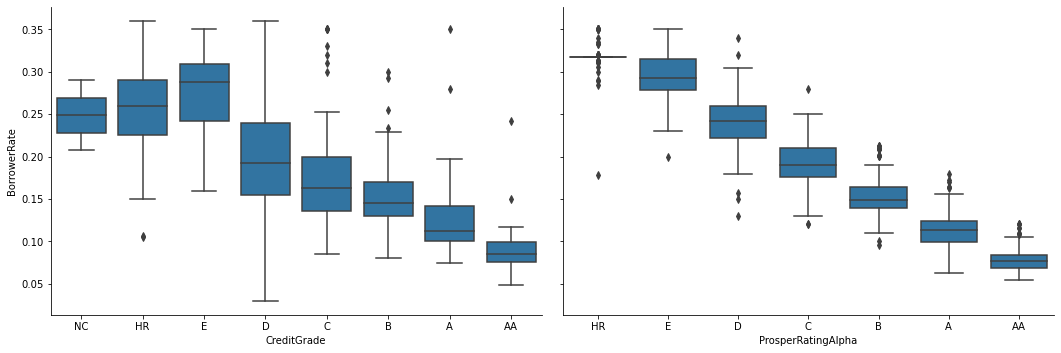

In [28]:
#plt.figure(figsize = [15, 20])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = categorical_cols1,
                height = 5, aspect = 1.5)
g.map(boxgrid)
plt.show();

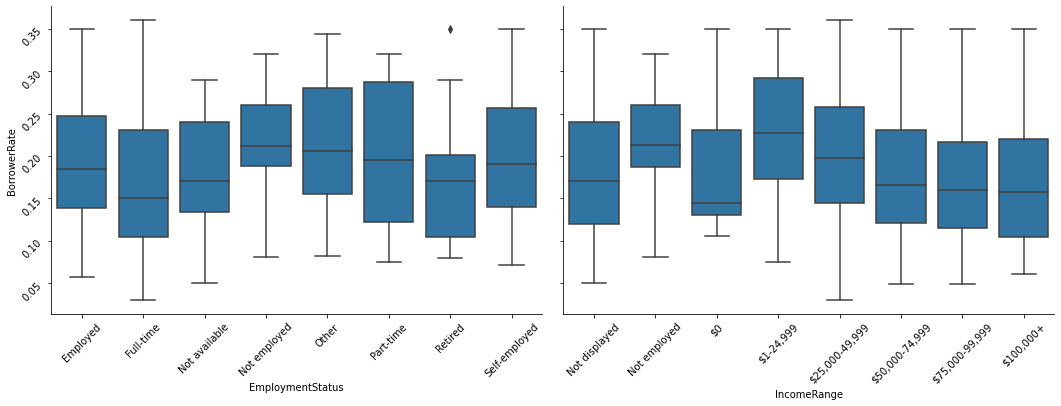

In [29]:
#plt.figure(figsize = [15, 20])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerRate'], x_vars = categorical_cols2,
                height = 5, aspect = 1.5)
g.map(boxgrid)
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
plt.show();

- We can see clearly that as the CreditGrade and ProsperRating improve, the mean borrower rate comes down. 
- Those not employed tend to get the highest borrower rates. 
- Full-time amd employed persons earning between 50K and 100K+ tend to get the lowest interests rates

Lets have a look at the relationship between some of the categorical variables

In [30]:
categorical_cols

['CreditGrade',
 'ProsperRatingAlpha',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange']

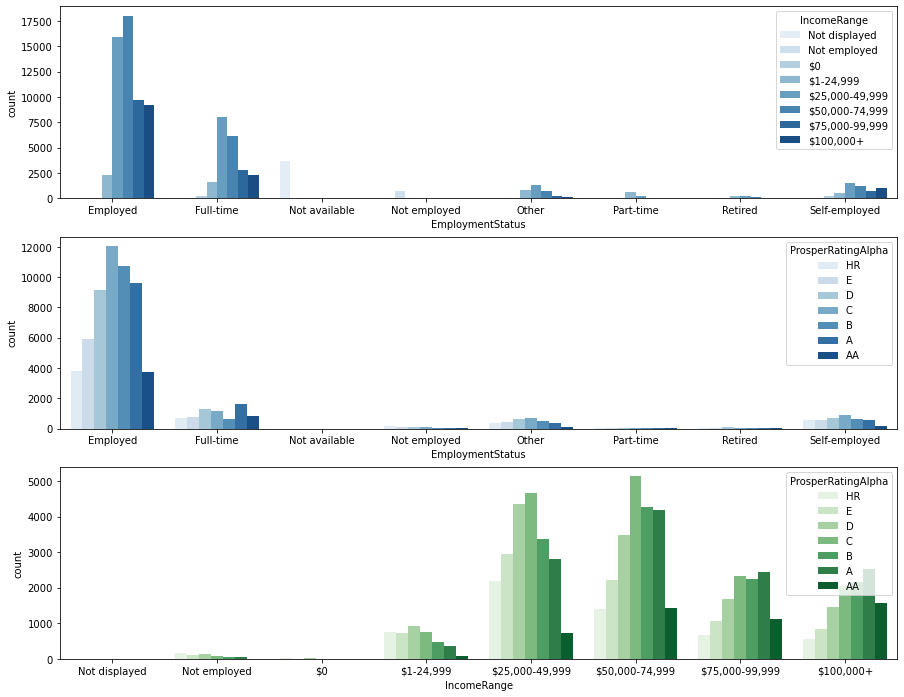

In [31]:
# since there's only four subplots to create, using the full data should be fine.
plt.figure(figsize = [15, 12])

# subplot 1: EmploymentStatus vs IncomeRange
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')

# subplot 2: EmploymentStatus vs. ProsperRatingAlpha
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'ProsperRatingAlpha', palette = 'Blues')
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: IncomeRange vs. ProsperRatingAlpha, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'IncomeRange', hue = 'ProsperRatingAlpha', palette = 'Greens')
#ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

Correlates with what we saw earlier, i.e. highest earners will tend to be full-time employees, D ProsperRating is most common for those in the 25K - 50L range and C in the 50K - 75K range

Let's dive into the relationship between some of our other variables

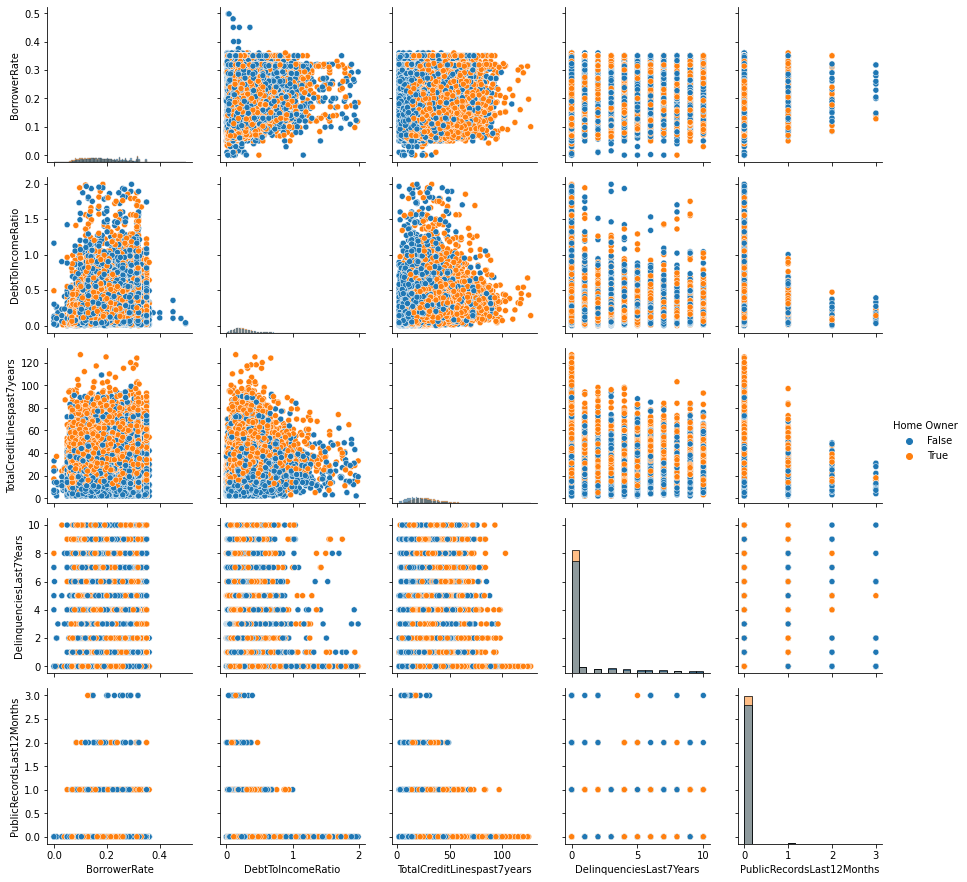

In [32]:
cols = ['BorrowerRate','DebtToIncomeRatio','TotalCreditLinespast7years','DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'IsBorrowerHomeowner']
g = sb.PairGrid(df[cols], hue="IsBorrowerHomeowner")
g.map_diag(sb.histplot)
g.map_offdiag(sb.scatterplot)
g.add_legend(title="Home Owner", adjust_subtitles=True)

Interestingly, home owners tend to have a lower debit to income ratio while having more credit lines over the last 7 years. Likewise, being a home owner tends to attract a lower borrower rate. 

Lets delve further into the relationship between borrower rate, home ownership and debt to income ratio

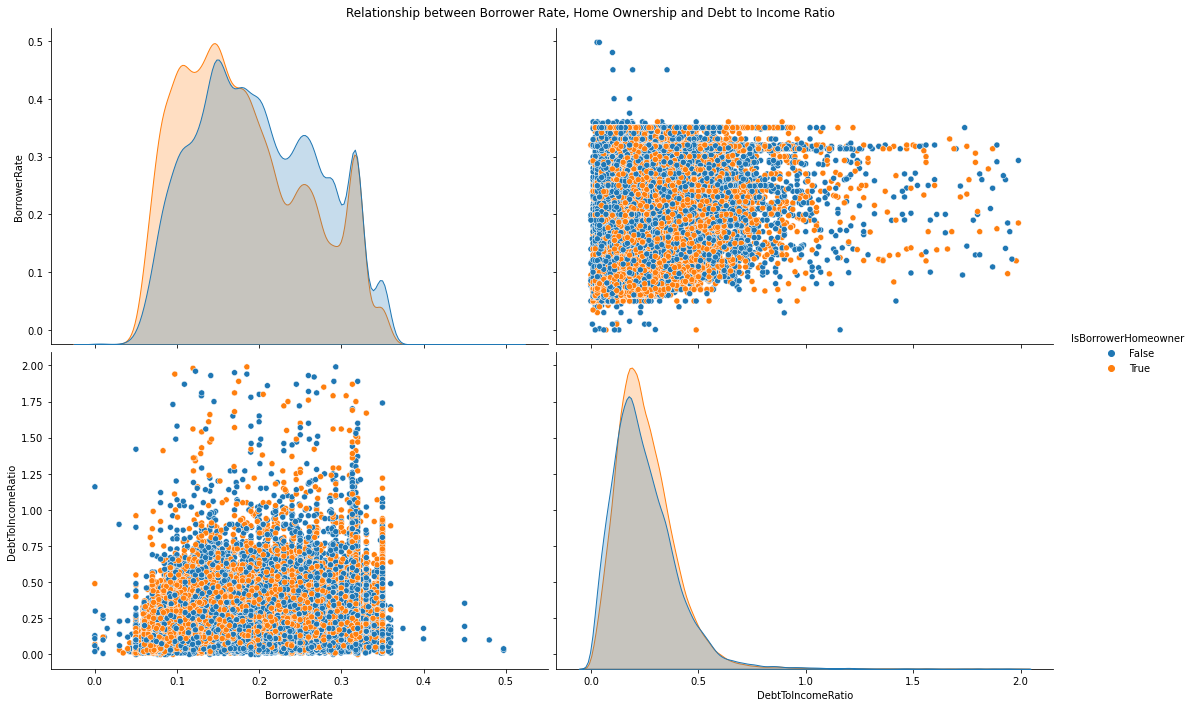

In [33]:
ax = sb.pairplot(df[['BorrowerRate', 'IsBorrowerHomeowner', 'DebtToIncomeRatio']], hue="IsBorrowerHomeowner", height=5, aspect=1.5)
ax.fig.subplots_adjust(top=.95)
ax.fig.suptitle('Relationship between Borrower Rate, Home Ownership and Debt to Income Ratio');

The distribution for DebtToIncome is quite similar whether a home owner or not, while being a home owner does attract a slightly better borrower rate, as we already observed above.

Let's see if we can spot a relationship between employee status duration and borrower rate

In [34]:
df['EmploymentStatusDuration'].value_counts()

0.0      1286
4.0       983
3.0       977
2.0       959
5.0       957
         ... 
567.0       1
662.0       1
733.0       1
690.0       1
581.0       1
Name: EmploymentStatusDuration, Length: 591, dtype: int64

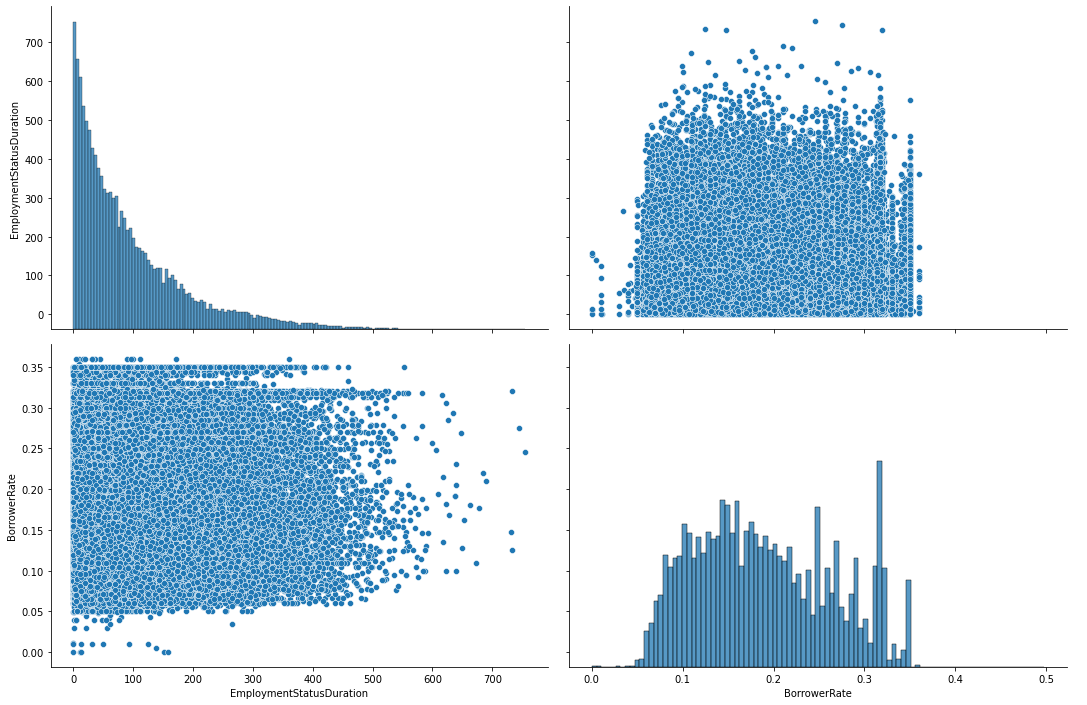

In [35]:
g = sb.PairGrid(df[['EmploymentStatusDuration', 'BorrowerRate']], height=5, aspect=1.5)
g.map_diag(sb.histplot)
g.map_offdiag(sb.scatterplot)
g.add_legend()

Doesnt seem like there is much insight to be gained here.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- We see some postiive correlations between monthly loan payment and loan original amount, as one would expect and negative correlations between borrower rate and prosperscore, i.e. the worse the score, the higher the rate. This doesn't give us too much info though as the prosper score is likely a function of all the other variables. As such, its an expected correlation which doesn't describe why the borrower rate is what it is.
- Credit score has a medium strong negative correlation with borrower rate, i.e. the lower the credit score, the higher the borrower rate. Many of the other numeric variable have a weak linear correlation with borrower rate, but its possible that their relationship is non-linear with borrower rate.
- We can see clearly that as the CreditGrade and ProsperRating improve, the mean borrower rate comes down. Those not employed tend to get the highest borrower rates. Full-time employed persons earning between 50K and 100K+ tend to get the lowest interests rates


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- We saw that the highest earners will tend to be full-time employees, D ProsperRating is most common for those in the 25K - 50L range and C in the 50K - 75K range
- Interestingly, home owners tend to have a lower debit to income ratio while having more credit lines over the last 7 years. Likewise, being a home owner tends to attract a lower borrower rate.
- The distribution for DebtToIncome is quite similar whether a home owner or not, while being a home owner doesnt attract a slightly better borrower rate, as we already observed above.
- Employment status duration doesnt seem to be a factor

## Multivariate Exploration

I'd like to explore the relationship between Borrower Rate, Home Ownership, Credit Rating and Income Range.

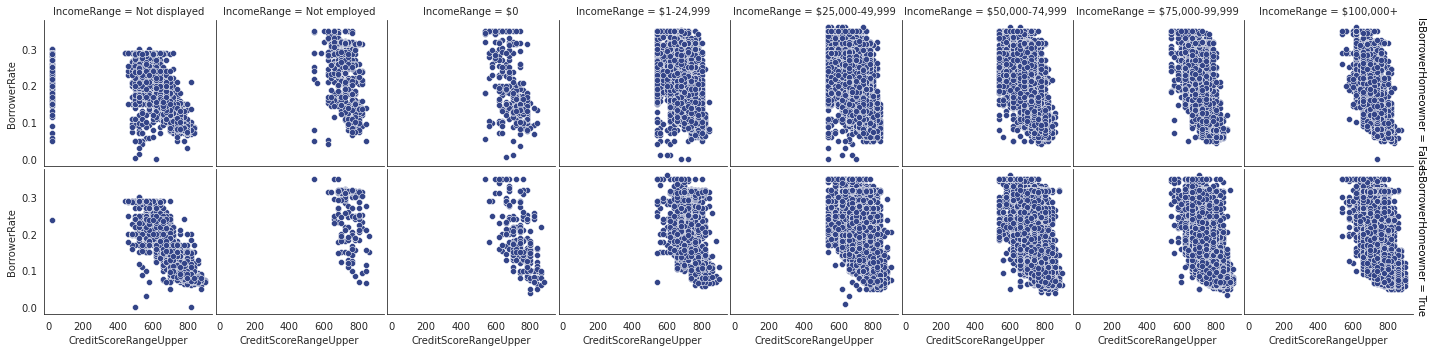

In [37]:
with sb.axes_style("white"):
    g = sb.FacetGrid(df, row="IsBorrowerHomeowner", col="IncomeRange", margin_titles=True, height=2.5)
g.map(sb.scatterplot, "CreditScoreRangeUpper", "BorrowerRate", color="#334488")
g.figure.subplots_adjust(wspace=.02, hspace=.02)

Its hard to make an inferences from this since the upper end of the credit range seems to be quite similar across the board

We know that the Credit Grade/Prosper Score correlates with the borrower rate, but its not clear what contributes to that credit grade or prosper score, so let's unpack that a little

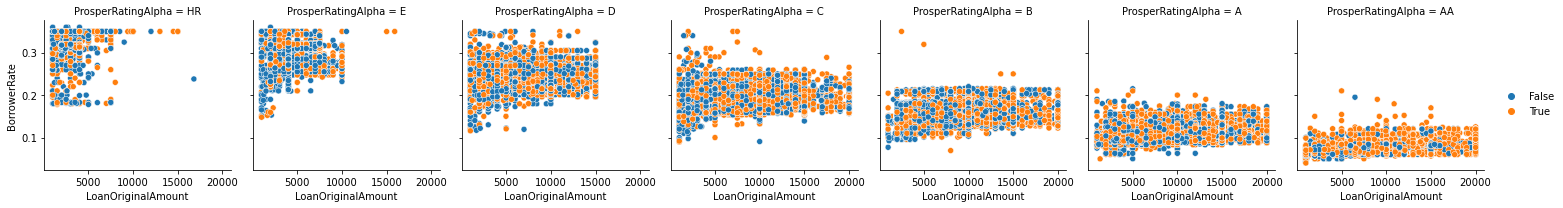

In [52]:
g = sb.FacetGrid(df, col="ProsperRatingAlpha")
g.map_dataframe(sb.scatterplot, x="LoanOriginalAmount", y="BorrowerRate", hue="IsBorrowerHomeowner")
g.add_legend()

We can see from this that ProsperRatingAlpha is the clearest indiator of the borrower rate, so we need to fully understand what leads to this prosper rating. We know from earlier that Employment Status and Income Range are important factors, so let's explore their relationship to Prosper Rating

In [54]:
df.IncomeRange.values

['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+', '$100,000+', ..., '$50,000-74,999', '$75,000-99,999', '$25,000-49,999', '$25,000-49,999', '$50,000-74,999']
Length: 92623
Categories (8, object): ['Not displayed' < 'Not employed' < '$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

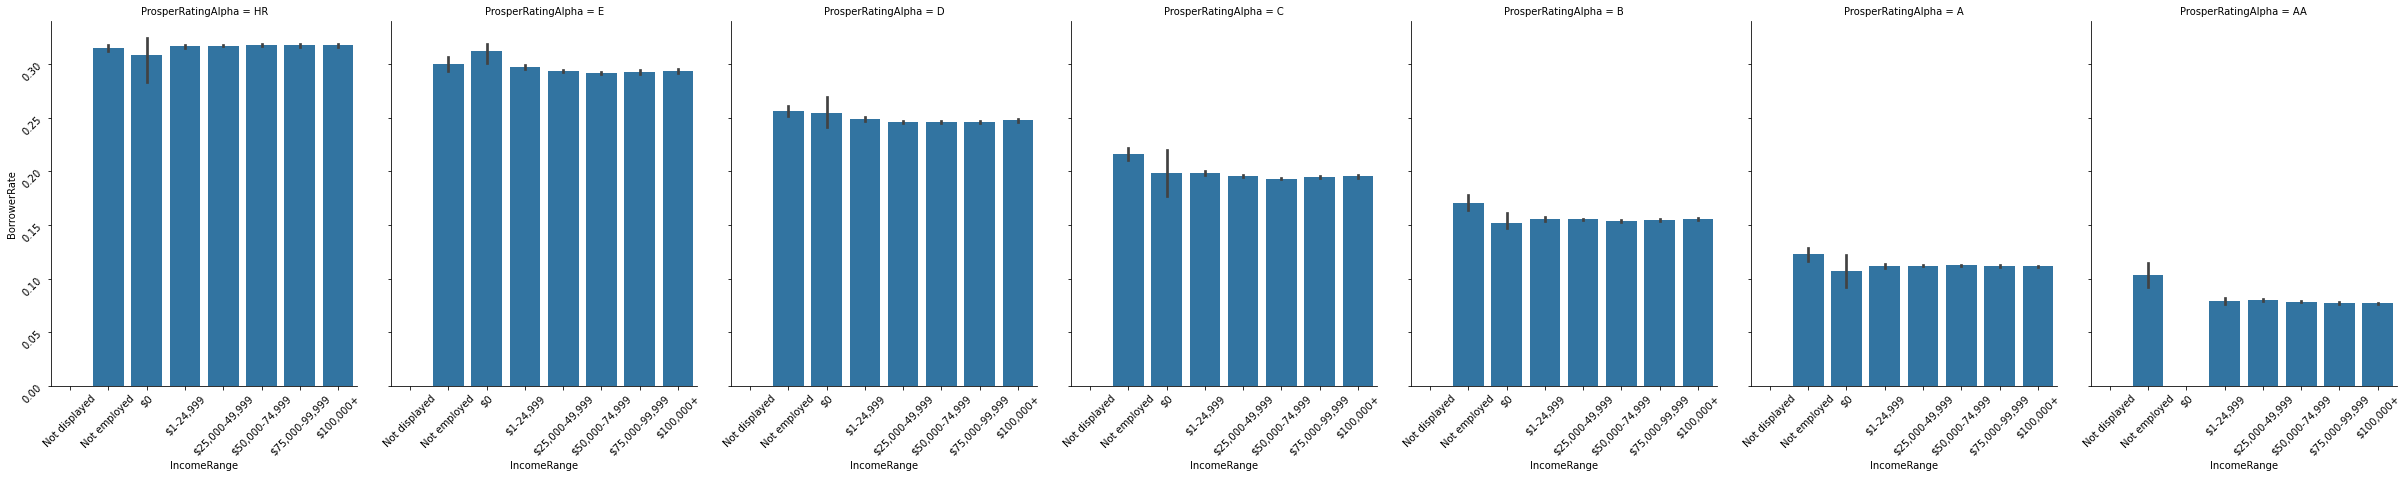

In [62]:
g = sb.FacetGrid(df, col="ProsperRatingAlpha", height=6, aspect=.8)
g.map(sb.barplot, "IncomeRange", "BorrowerRate", order=["Not displayed", "Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"])
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
plt.show();

For each prosper rating, we see almost equal contributions for all the ranges of income.

C:\CondaEnvs\ds\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


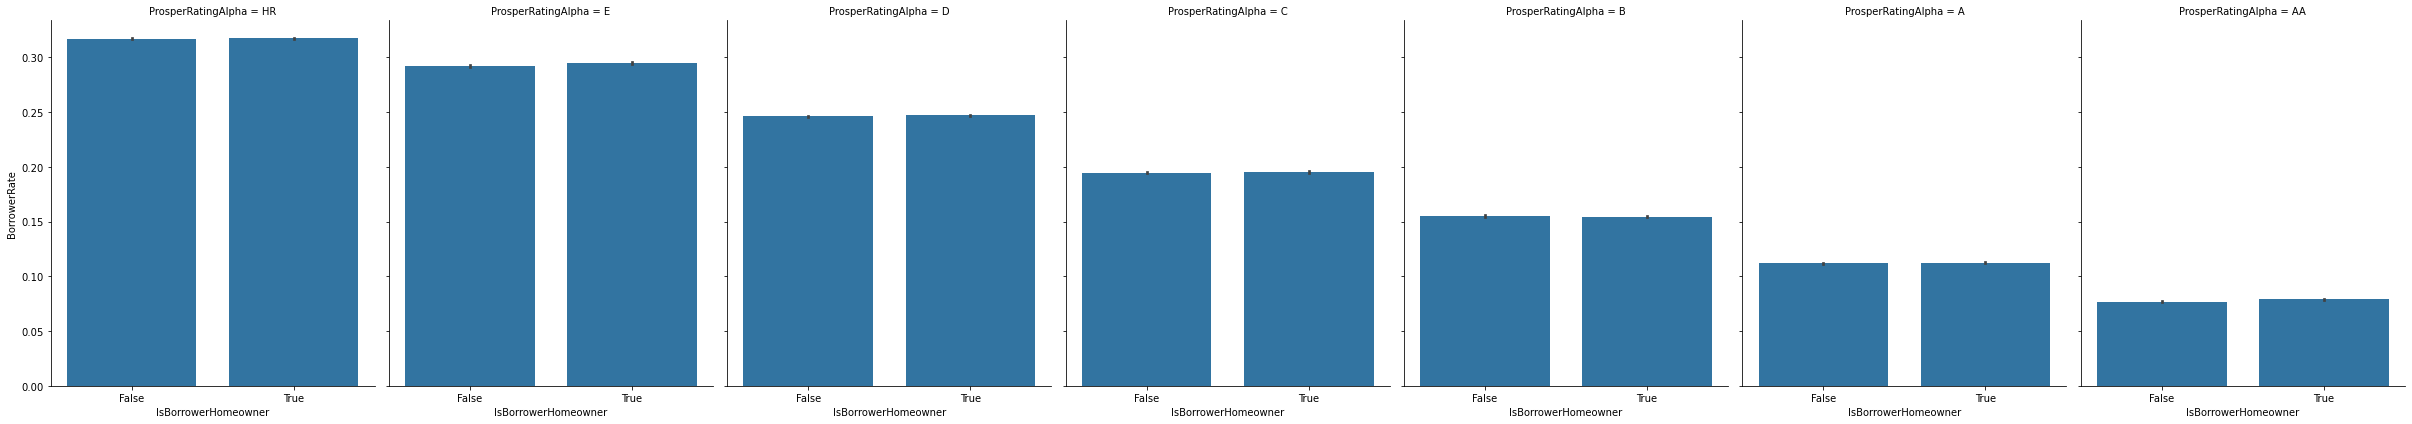

In [59]:
g = sb.FacetGrid(df, col="ProsperRatingAlpha", height=6, aspect=.8)
g.map(sb.barplot, "IsBorrowerHomeowner", "BorrowerRate");

For each prosper rating, we see almost equal contributions whether the person is a home owner or not

C:\CondaEnvs\ds\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


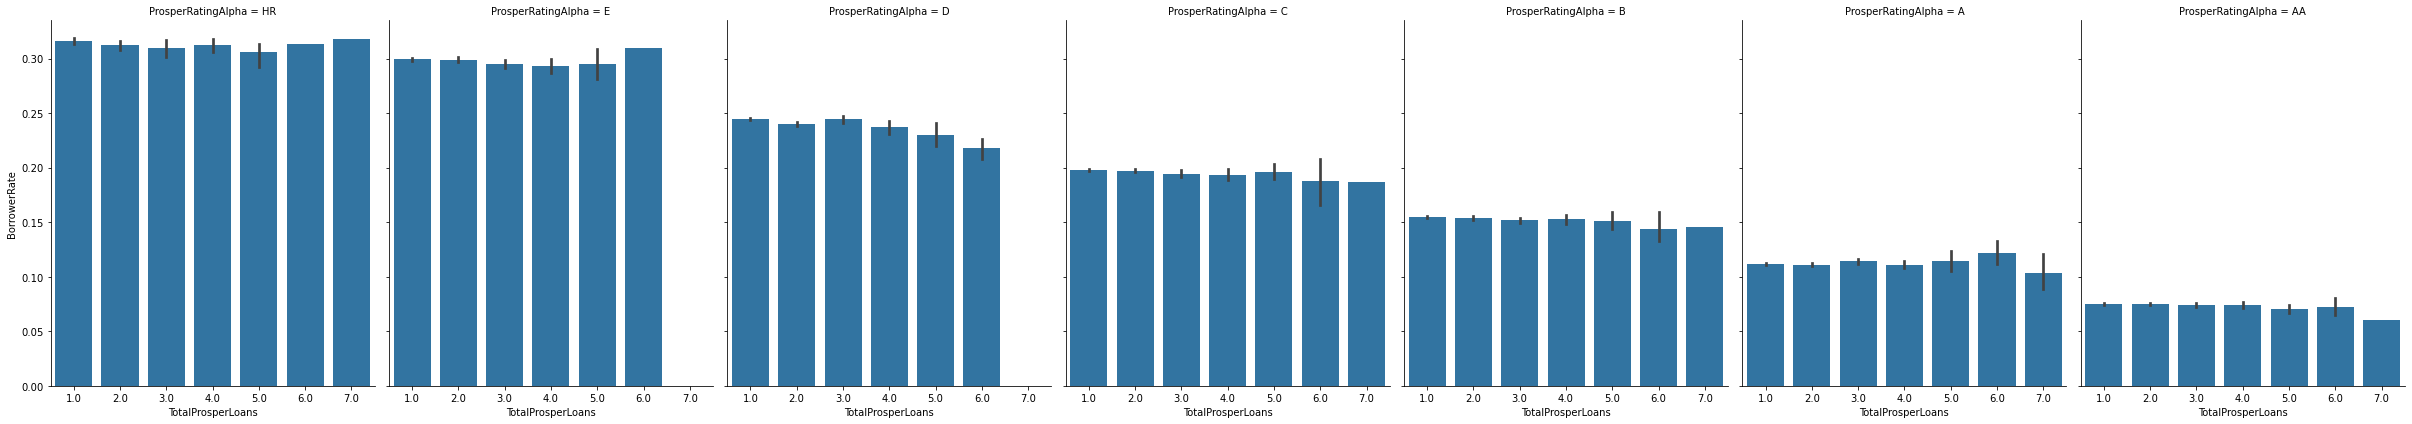

In [60]:
g = sb.FacetGrid(df, col="ProsperRatingAlpha", height=6, aspect=.8)
g.map(sb.barplot, "TotalProsperLoans", "BorrowerRate");

C:\CondaEnvs\ds\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


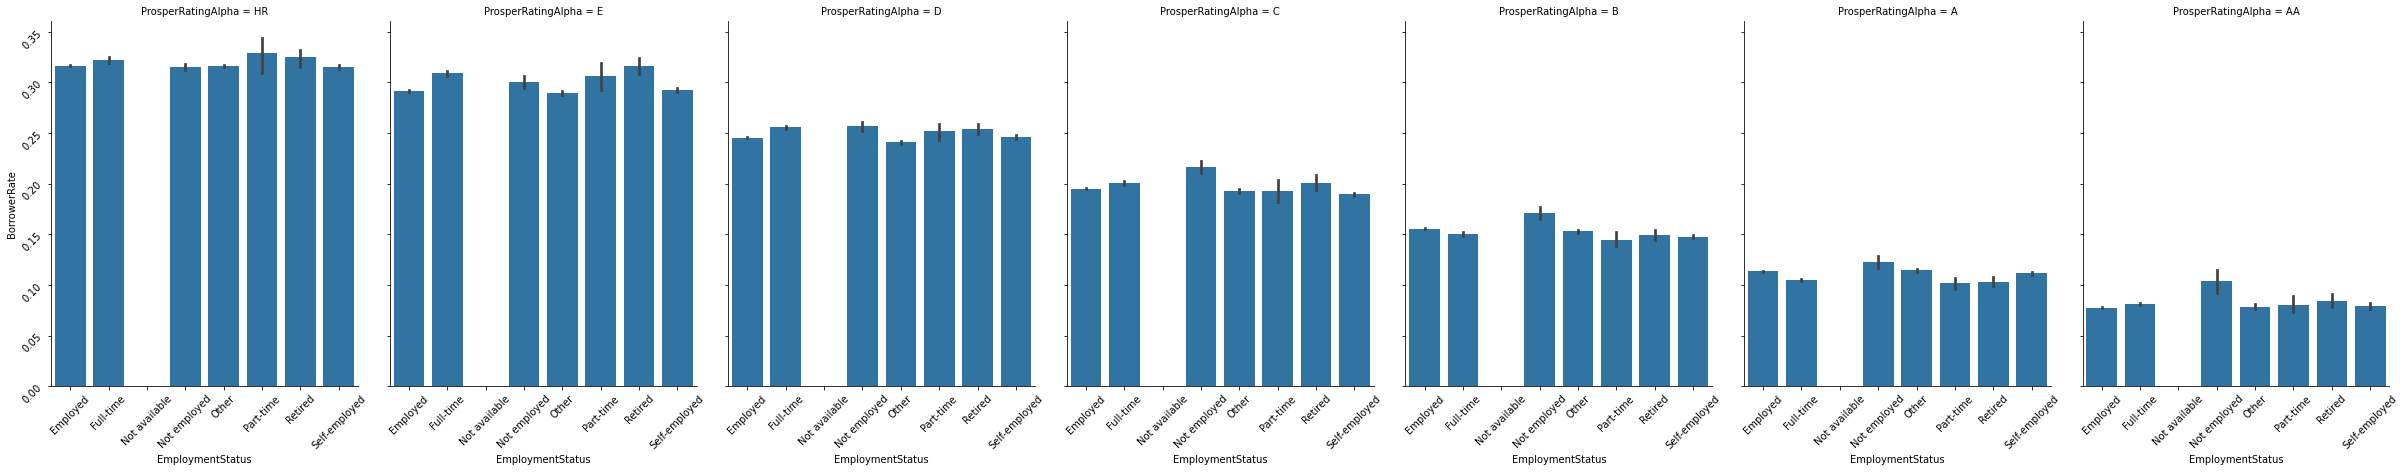

In [63]:
g = sb.FacetGrid(df, col="ProsperRatingAlpha", height=6, aspect=.8)
g.map(sb.barplot, "EmploymentStatus", "BorrowerRate")
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45)
plt.show();

Lets see how credit score varies across income range and prosper rating

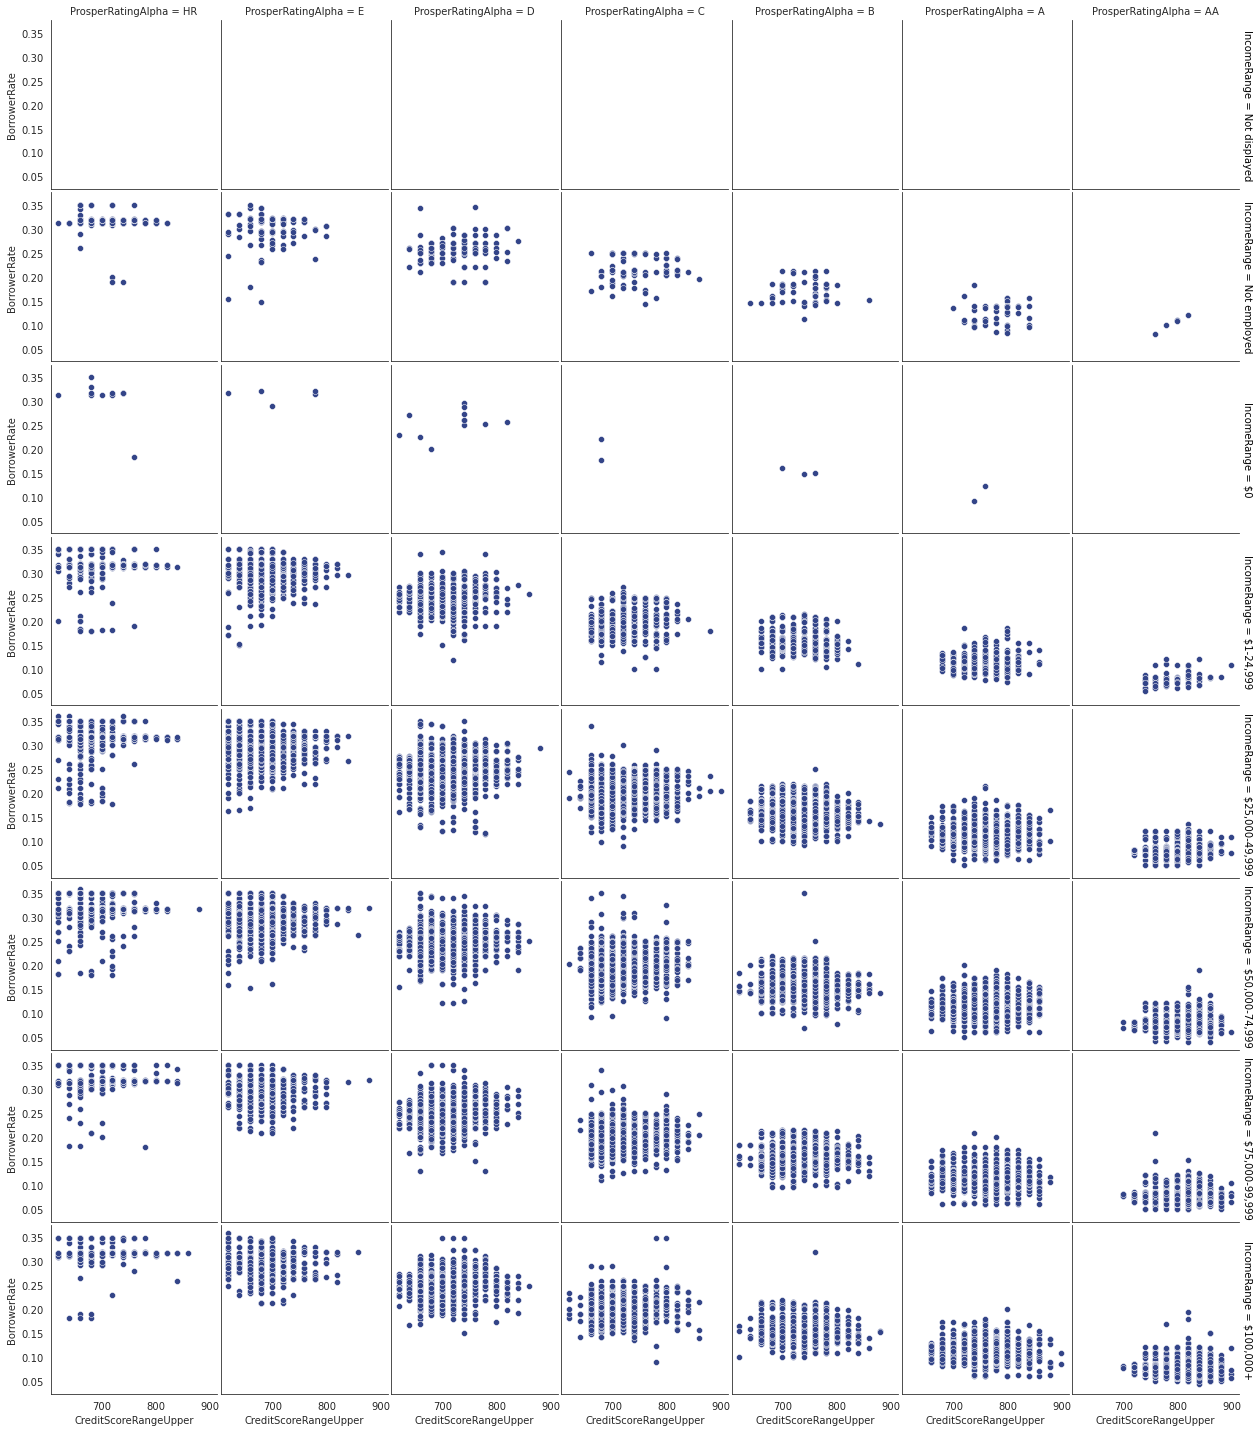

In [66]:
with sb.axes_style("white"):
    g = sb.FacetGrid(df, col="ProsperRatingAlpha", row="IncomeRange", margin_titles=True, height=2.5)
g.map(sb.scatterplot, "CreditScoreRangeUpper", "BorrowerRate", color="#334488")
#g.set_axis_labels("Total bill (US Dollars)", "Tip")
#g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It is clear the the Prosper Rating given to a loan is the determining factor in what dictates the borrower rate, however I wasn't able to clearly see strong correlations with what led to the specific Prosper Rating. Credit rating, home ownership, income range, employment status all contribute somewhat, but a deeper analysis is required to further understand these and other relationships not investigated. 

### Were there any interesting or surprising interactions between features?

I found it interedting that although income range does contribute to the prosper rating and borrower rate, you still see borrower rates from low to high with a mix of income ranges, indicating that there are other factors at play.

## Conclusions



From our analysis we can determine the following:
    
- The Prosper Rating is the score given to loan applications and this score is the determining factor in borrower rate. 
- The contibutions to this score are home ownership, income range, debt to income ratio, credit score, employment status. 
- It seems that these all make small contributions to determining what the Prosper Rating is, rather than it being attributed to a single major variable. 
- Being a home owner, having a higher income, a lower debt to income ration, a higher credit score and being full-time employed tend to attract lower borrower rates.